In [ ]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install jikanpy-v4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from jikanpy import Jikan
import time

In [ ]:
import datetime

In [ ]:
from collections import Counter

## top animes / generos

In [ ]:
jikan = Jikan()

results_lst = []
for i in range(1,119):
    if i%2==0:
        time.sleep(2)
    results = jikan.top(type='anime', page=i)
    results_lst.append(results)

In [ ]:
import pandas as pd
from collections import Counter

# Lists to hold our data
titles = []
demographics_list = []
genres_list = []
studios_list = []
episode_counts = []
durations = []

# Process each result
for result in results_lst:
    for anime in result['data']:
        
        # Title
        titles.append(anime['title_english'])
        
        # Demographics
        demographics = ', '.join([demographic["name"] for demographic in anime['demographics']])
        demographics_list.append(demographics)
        
        # Genres
        genres = ', '.join([genre["name"] for genre in anime['genres']])
        genres_list.append(genres)
        
        # Studios
        studios = ', '.join([studio["name"] for studio in anime['studios']])
        studios_list.append(studios)
        
        # Episode Count
        episode_counts.append(anime["episodes"])
        
        # Duration
        durations.append(anime["duration"])
        

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Demographics': demographics_list,
    'Genres': genres_list,
    'Studios': studios_list,
    'Episode Count': episode_counts,
    'Duration': durations
})


print(df)  # Display the first few rows to verify

                                 Title Demographics  \
0     Fullmetal Alchemist: Brotherhood      Shounen   
1                          Steins;Gate                
2                     Gintama Season 4      Shounen   
3      Bleach: Thousand-Year Blood War      Shounen   
4      Attack on Titan Season 3 Part 2      Shounen   
...                                ...          ...   
2945                              None      Shounen   
2946                      Nabari no Ou      Shounen   
2947  Maria Watches Over Us: Printemps                
2948       Mary and the Witch's Flower                
2949                              None      Shounen   

                                 Genres                Studios  Episode Count  \
0     Action, Adventure, Drama, Fantasy                  Bones           64.0   
1               Drama, Sci-Fi, Suspense              White Fox           24.0   
2                Action, Comedy, Sci-Fi  Bandai Namco Pictures           51.0   
3            Ac

In [ ]:
# Lists to hold our data
titles = []
demographics_list = []
genres_list = []
studios_list = []
episode_counts = []
durations = []
scores = []
ranks = []
popularities = []
favorites_list = []

# Process each result
for result in results_lst:
    for anime in result['data']:
        
        # Title
        titles.append(anime['title_english'])
        
        # Demographics
        demographics = ', '.join([demographic["name"] for demographic in anime['demographics']])
        demographics_list.append(demographics)
        
        # Genres
        genres = ', '.join([genre["name"] for genre in anime['genres']])
        genres_list.append(genres)
        
        # Studios
        studios = ', '.join([studio["name"] for studio in anime['studios']])
        studios_list.append(studios)
        
        # Episode Count
        episode_counts.append(anime["episodes"])
        
        # Duration
        durations.append(anime["duration"])

        # Score
        scores.append(anime["score"])

        # Rank
        ranks.append(anime["rank"])

        # Popularity
        popularities.append(anime["popularity"])

        # Favorites
        favorites_list.append(anime["favorites"])

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Demographics': demographics_list,
    'Genres': genres_list,
    'Studios': studios_list,
    'Episode Count': episode_counts,
    'Duration': durations,
    'Score': scores,
    'Rank': ranks,
    'Popularity': popularities,
    'Favorites': favorites_list
})
df = pd.DataFrame(df)


In [ ]:
df = pd.DataFrame(df)
df

,Title,Demographics,Genres,Studios,Episode Count,Duration,Score,Rank,Popularity,Favorites
0,Fullmetal Alchemist: Brotherhood,Shounen,"Action, Adventure, Drama, Fantasy",Bones,64.0,24 min per ep,9.10,1.0,3,219982
1,Steins;Gate,,"Drama, Sci-Fi, Suspense",White Fox,24.0,24 min per ep,9.07,2.0,13,185118
2,Gintama Season 4,Shounen,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,51.0,24 min per ep,9.06,4.0,334,16203
3,Bleach: Thousand-Year Blood War,Shounen,"Action, Adventure, Fantasy",Pierrot,13.0,24 min per ep,9.06,3.0,443,19205
4,Attack on Titan Season 3 Part 2,Shounen,"Action, Drama",Wit Studio,10.0,23 min per ep,9.05,5.0,22,56047
...,...,...,...,...,...,...,...,...,...,...
2945,None,Shounen,"Comedy, Supernatural",LIDENFILMS,1.0,2 min,7.26,2797.0,2767,220
2946,Nabari no Ou,Shounen,"Action, Drama, Fantasy",J.C.Staff,26.0,24 min per ep,7.26,2824.0,1364,1238
2947,Maria Watches Over Us: Printemps,,"Drama, Girls Love",Studio Deen,6.0,1 min per ep,7.26,2819.0,6506,4
2948,Mary and the Witch's Flower,,"Adventure, Fantasy",Studio Ponoc,1.0,1 hr 42 min,7.26,2821.0,2049,169


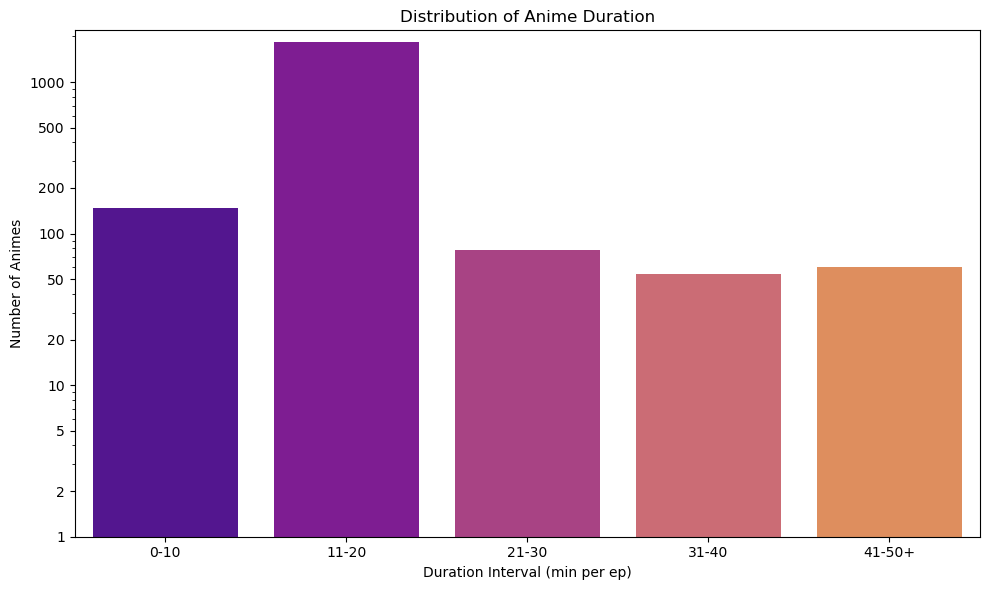

In [ ]:
# Convert the entire column to string type
df['Duration'] = df['Duration'].astype(str)

# Use regex to extract the numeric value for duration from each row
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Define your intervals. For example, in increments of 10 minutes.
bins = [10, 20, 30, 40, 50, np.inf]  # you can modify this based on your dataset
labels = ['0-10', '11-20', '21-30', '31-40', '41-50+']

sns.set_palette("plasma")

df['Duration_interval'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=False)

# Use a bar plot to see the distribution across intervals
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Duration_interval', order=labels)
plt.title("Distribution of Anime Duration")
plt.xlabel('Duration Interval (min per ep)')
plt.ylabel('Number of Animes')

plt.yscale('log')

# To ensure that the y-axis labels are interpretable, set them manually
yticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.yticks(yticks, yticks)  # The first argument is positions, the second is labels.

plt.tight_layout()
plt.savefig('anime_duration_distribution.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution
plt.show()

### 25 best rated animes

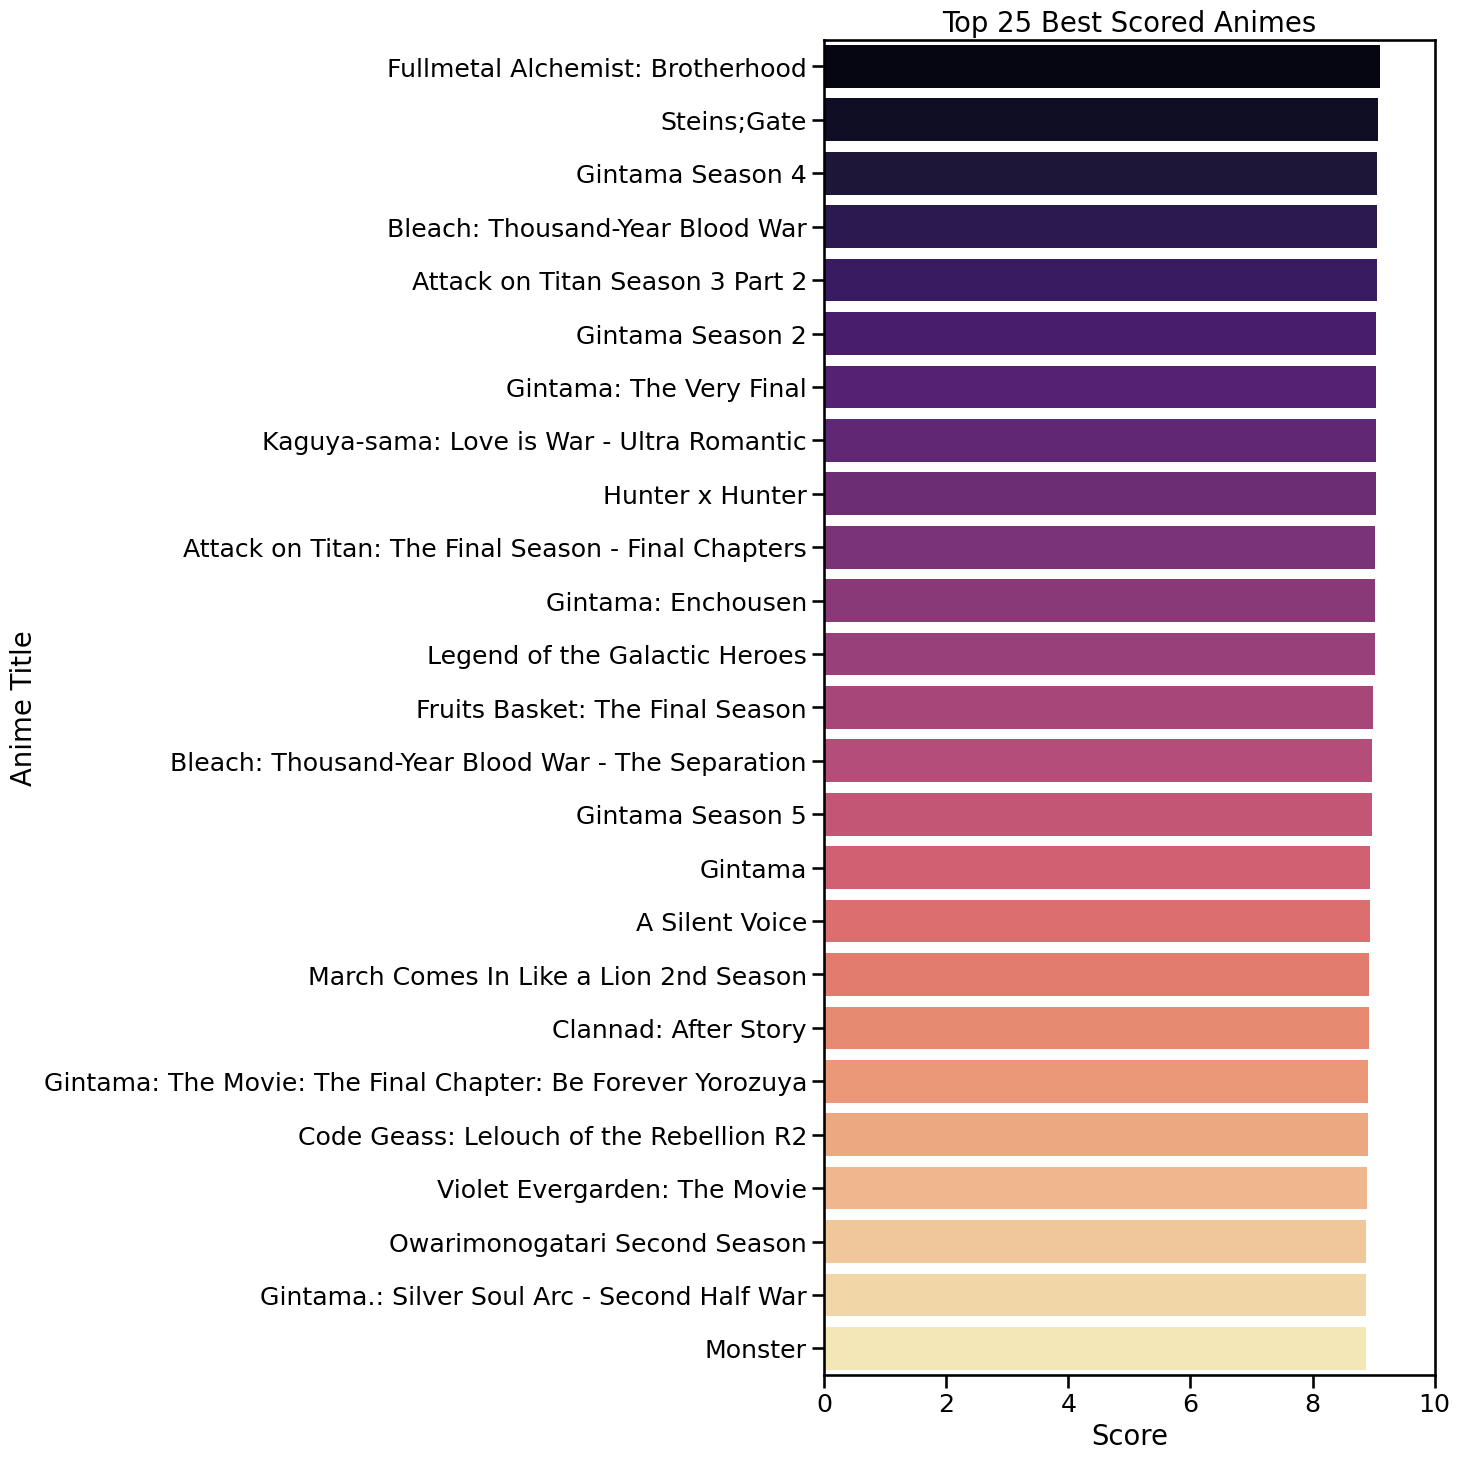

In [ ]:
# Sort the data and get the top 25 based on the 'Score'
top_25 = df.sort_values(by='Score', ascending=False).head(25)

# Enlarging the figure to fit longer anime titles
plt.figure(figsize=(15, 15))

# Increase the font size for better readability when projected or printed
sns.set_context("talk", font_scale=1.1)  # "talk" context is designed for slide presentations

# Plotting
sns.barplot(x=top_25['Score'], y=top_25['Title'], palette="magma")
plt.title('Top 25 Best Scored Animes')
plt.xlabel('Score')
plt.ylabel('Anime Title')
plt.xlim([0, 10])  # Assuming the score is out of 10. Adjust if necessary.

# Ensuring the layout is optimized to prevent cut-offs
plt.tight_layout()

# Save with transparency and 300 DPI resolution
plt.savefig('top_25_optimized.png', transparent=True, dpi=300)

# Display
plt.show()


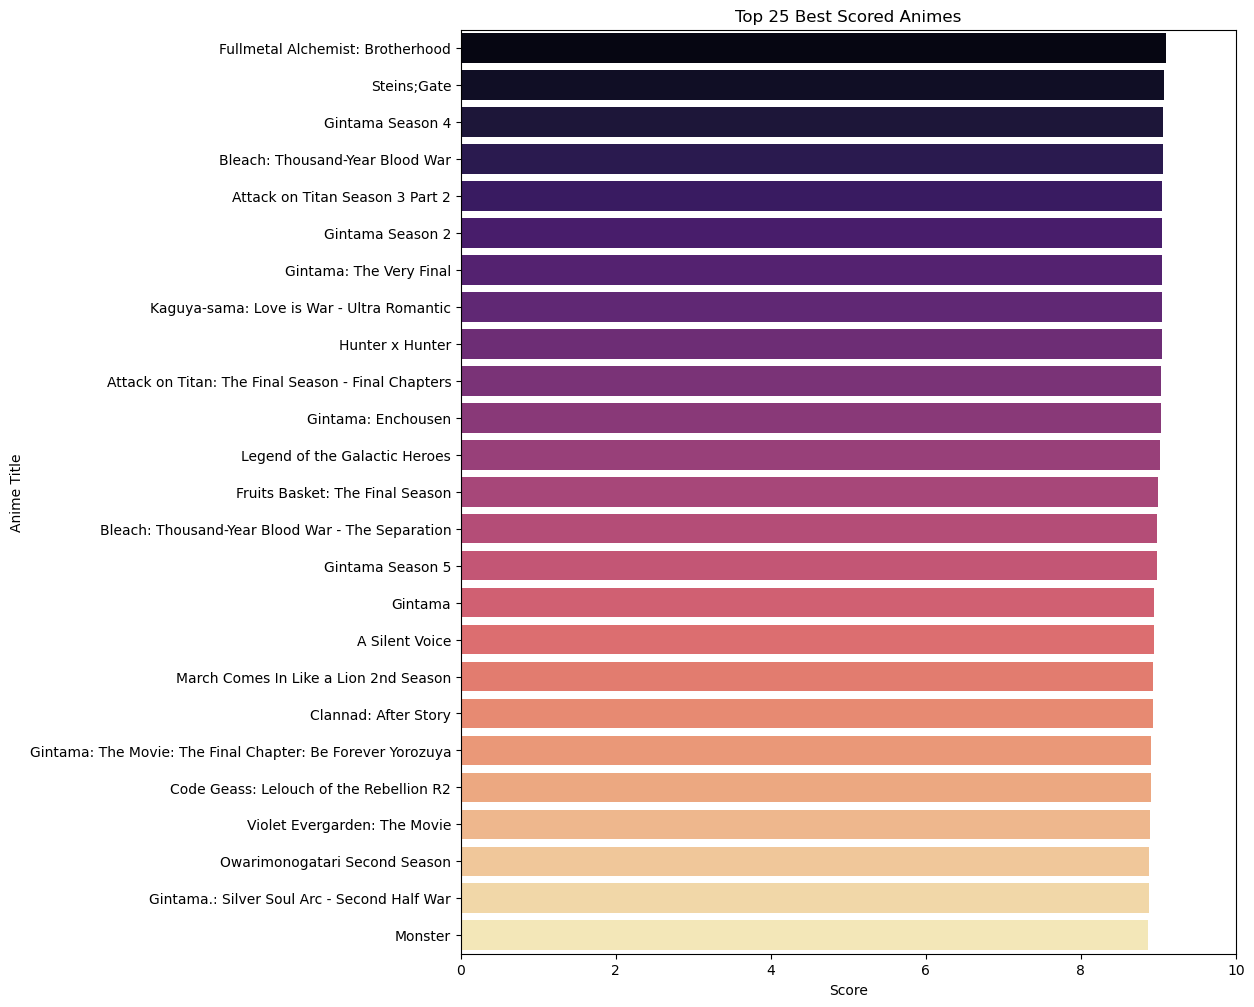

In [ ]:
# Sort the data and get the top 25 based on the 'Score'

top_25 = df.sort_values(by='Score', ascending=False).head(25)

plt.figure(figsize=(10, 12))
sns.barplot(x=top_25['Score'], y=top_25['Title'], palette="magma")
plt.title('Top 25 Best Scored Animes')
plt.xlabel('Score')
plt.ylabel('Anime Title')
plt.xlim([0, 10])  # Assuming the score is out of 10. Adjust if necessary.
plt.savefig('top_25.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution

plt.show()

## demographics per anime

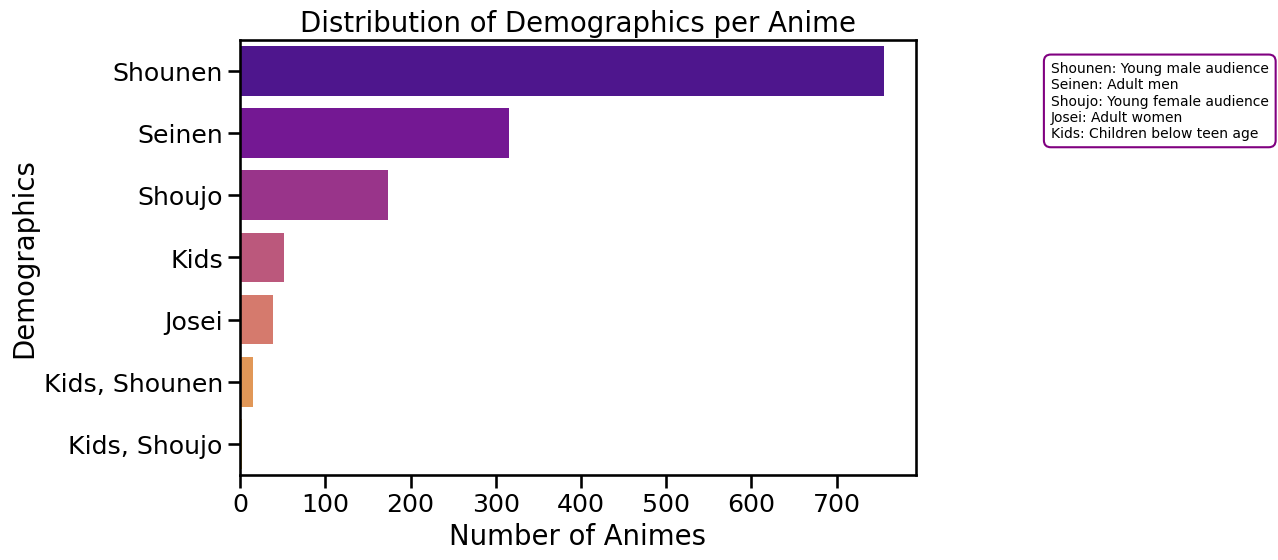

In [ ]:
# Filter out empty or NaN values
df_exploded = df_exploded[df_exploded['Demographics'] != '']
df_exploded = df_exploded.dropna(subset=['Demographics'])

explanations = {
    'Shounen': 'Young male audience',
    'Seinen': 'Adult men',
    'Shoujo': 'Young female audience',
    'Josei': 'Adult women',
    'Kids': 'Children below teen age'
    # Add other demographics and their explanations here
}

# Create the text for the annotation box
annotation_text = '\n'.join([f"{key}: {val}" for key, val in explanations.items()])

# Visualization - increase the figure's width
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_exploded, y='Demographics', order=df_exploded['Demographics'].value_counts().index, palette="plasma")

# Adjusting text placement
props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='purple')
ax.text(1.2, 0.95, annotation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.title('Distribution of Demographics per Anime')
plt.xlabel('Number of Animes')
plt.ylabel('Demographics')

# Save with transparency and 300 DPI resolution
plt.tight_layout()  # Ensures all elements fit within the saved figure's boundaries
plt.savefig('demographics.png', transparent=True, dpi=300)

plt.show()


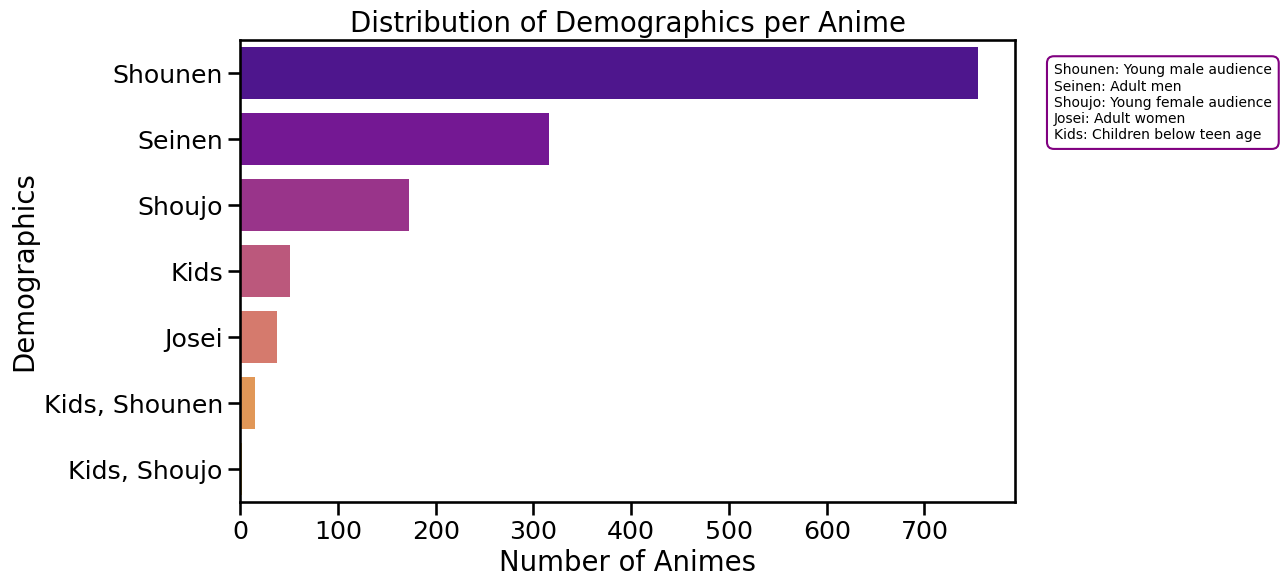

In [ ]:
# Filter out empty or NaN values
df_exploded = df_exploded[df_exploded['Demographics'] != '']
df_exploded = df_exploded.dropna(subset=['Demographics'])

explanations = {
    'Shounen': 'Young male audience',
    'Seinen': 'Adult men',
    'Shoujo': 'Young female audience',
    'Josei': 'Adult women',
    'Kids': 'Children below teen age'
    # Add other demographics and their explanations here
}

# Create the text for the annotation box
annotation_text = '\n'.join([f"{key}: {val}" for key, val in explanations.items()])

# Visualization
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_exploded, y='Demographics', order=df_exploded['Demographics'].value_counts().index, palette="plasma")
props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='purple')
ax.text(1.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.title('Distribution of Demographics per Anime')
plt.xlabel('Number of Animes')
plt.ylabel('Demographics')
plt.savefig('demographics.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution

plt.show()

## rating x popularity

In [ ]:
df.columns

Index(['Title', 'Demographics', 'Genres', 'Studios', 'Episode Count',
       'Duration', 'Score', 'Rank', 'Popularity', 'Favorites'],
      dtype='object')

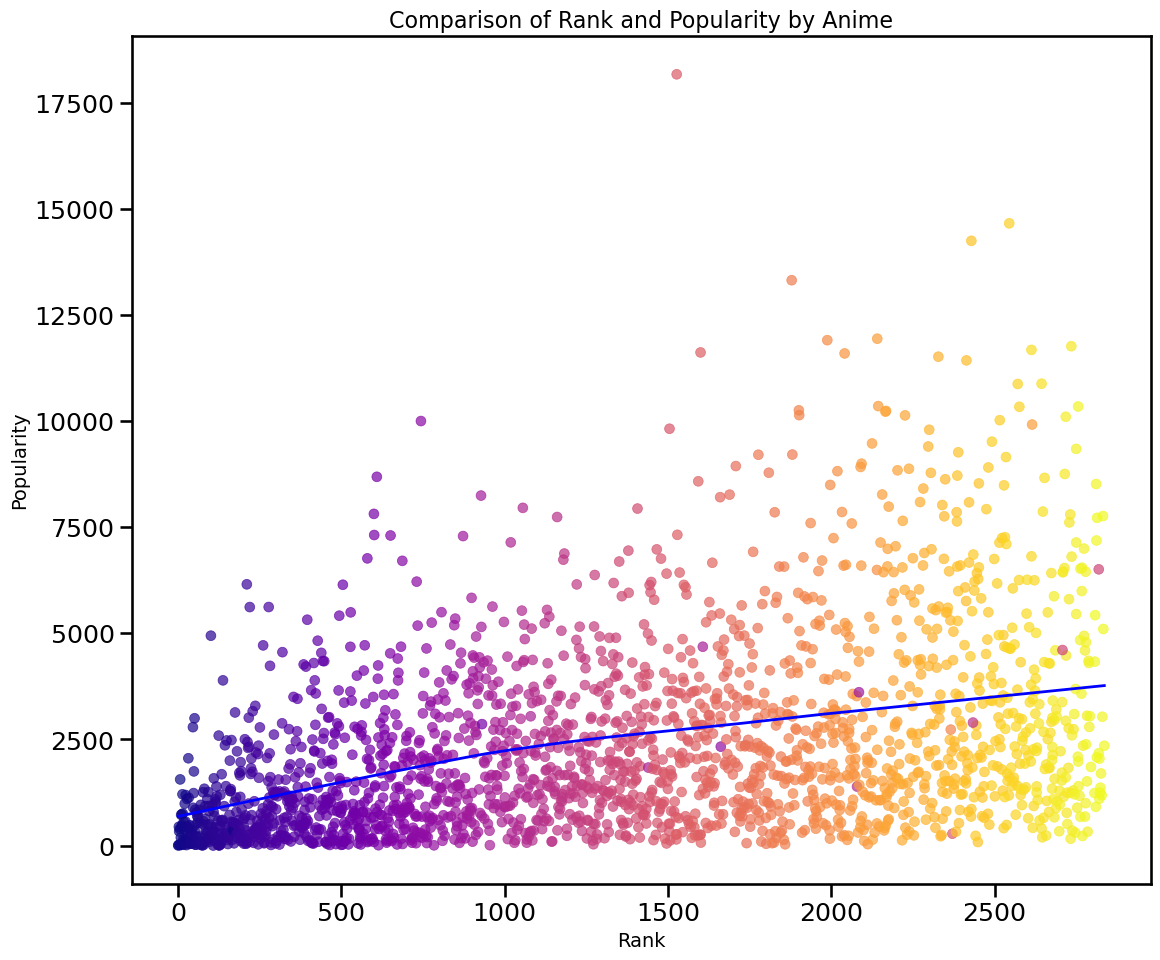

In [ ]:
plt.figure(figsize=(12, 10))

# Base scatter plot
sns.scatterplot(data=df, x='Rank', y='Popularity', hue='Title', legend=False, palette='plasma', alpha=0.7, edgecolor=None, s=50)

# Smooth regression line with a shaded confidence interval
sns.regplot(data=df, x='Rank', y='Popularity', scatter=False, ci='sd', line_kws={'color': 'blue', 'lw': 2}, lowess=True)

# Set title and labels
plt.title('Comparison of Rank and Popularity by Anime', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with transparency and high resolution
plt.savefig('rankxpop_combined.png', transparent=True, dpi=300)

# Display the plot
plt.show()


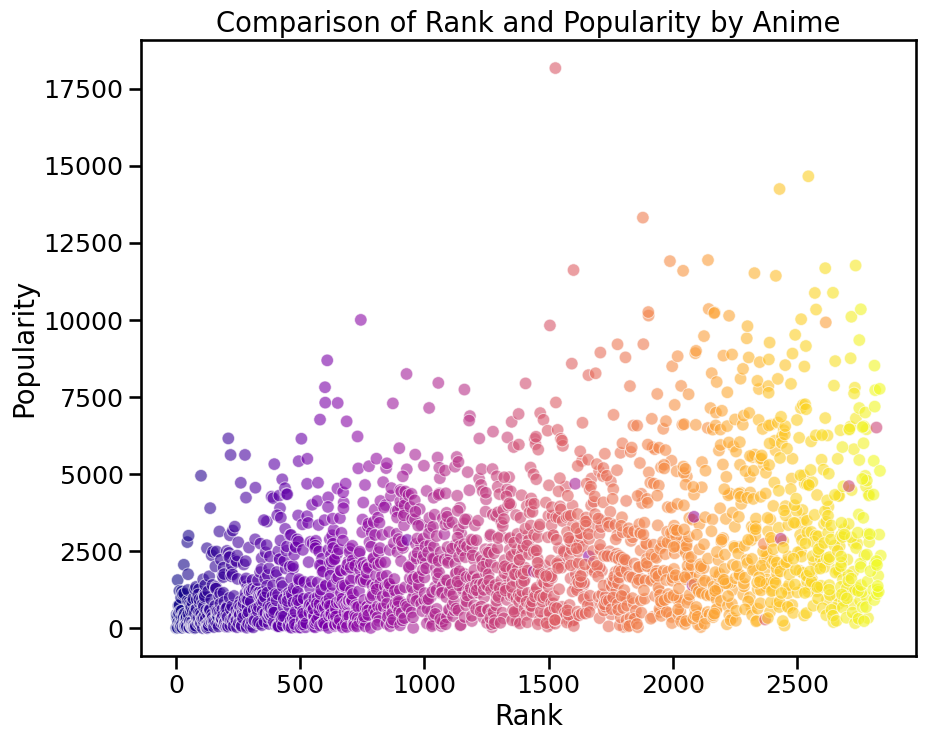

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Rank', y='Popularity', hue='Title', legend=False, palette='plasma', alpha=0.6)

# Set title and labels
plt.title('Comparison of Rank and Popularity by Anime')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.savefig('rankxpop.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution

# Display the plot
plt.show()

## episode count distribution

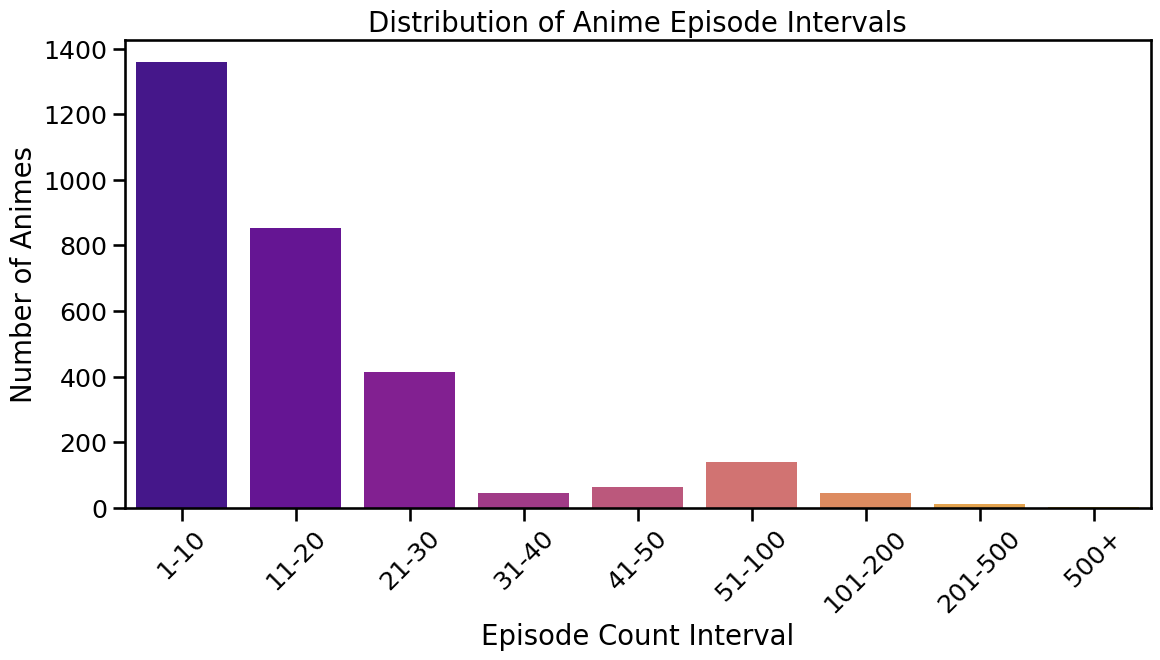

In [ ]:
# Define your intervals
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, np.inf]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-500', '500+']

df['EpisodeInterval'] = pd.cut(df['Episode Count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='EpisodeInterval', order=labels, palette='plasma')
plt.title('Distribution of Anime Episode Intervals')
plt.xlabel('Episode Count Interval')
plt.ylabel('Number of Animes')
plt.xticks(rotation=45)
plt.tight_layout()  # Use this before saving
plt.savefig('episodecount.png', transparent=True, dpi=300, bbox_inches='tight')  # Include bbox_inches

plt.show()


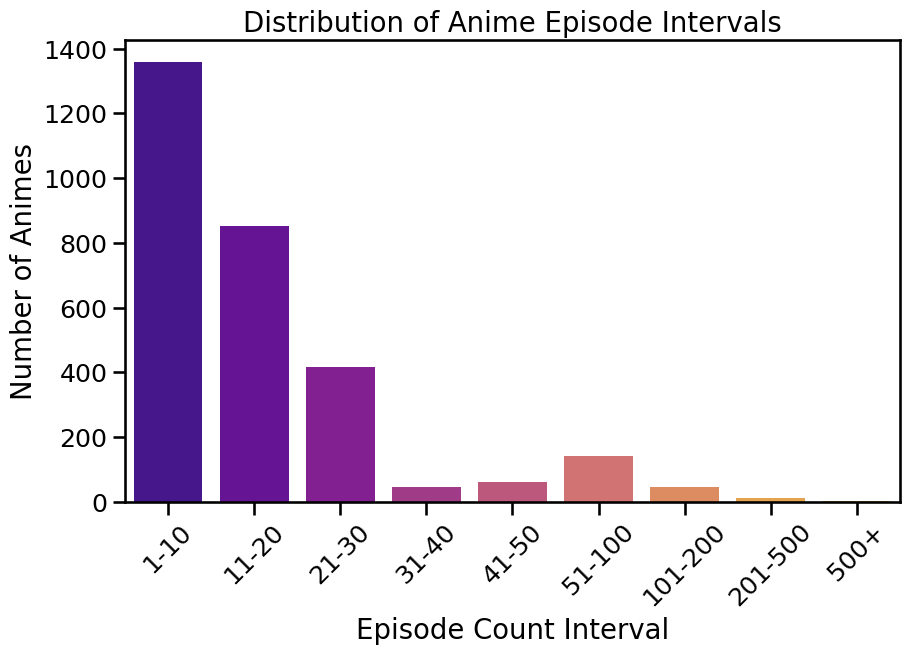

In [ ]:
# Define your intervals
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, np.inf]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-500', '500+']

df['EpisodeInterval'] = pd.cut(df['Episode Count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EpisodeInterval', order=labels, palette='plasma')
plt.title('Distribution of Anime Episode Intervals')
plt.xlabel('Episode Count Interval')
plt.ylabel('Number of Animes')
plt.xticks(rotation=45)
plt.savefig('episodecount.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution

plt.show()

# Data correlations: 

1- If possible, create a table with the different data/ If not possible, create small tables (like with just 2 or  columns)

2- Correlate: 

1- episode_no with the title_lst 
1.2- take the average(mean) of the number of episodes and plot it in a boxplot so we can see the outliers

2- title_lst with duration
2.1- put the duration in a box plot to check for outliers 
2.2- take the mean or median of the duration (idk if it's gonna be possible becuase its a string, but maybe then we can get like 15 modes and interpret from that? 

3- pie chart with the demographics percentage 

4- bar chart with the demographics percentage applied to the number of animes there is (there are 2950, so we can't know which one is to each demographic really, but we can just apply the same percentages just in order to have the correlation chart 

5- and then the same as above: a chart with the genres and the number of animers (2590) correlating the same percentage as the animes (like this part---> {'Action': 1072, 'Adventure': 656, 'Drama': 764, 'Fantasy': 785, 'Sci-Fi': 506, 'Suspense': 81, 'Comedy': 1078, 'Romance': 539, 'Supernatural': 383, 'Award Winning': 130, 'Mystery': 306, 'Sports': 174, 'Slice of Life': 230, 'Ecchi': 86, 'Horror': 64, 'Avant Garde': 17, 'Boys Love': 33, 'Gourmet': 31, 'Girls Love': 28, 'Hentai': 44, 'Erotica': 3} <--- here it could be a bar chart or any other you find fit! :)


In [ ]:
import pandas as pd
import matplotlib as mb 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data = pd.DataFrame(data_dict)

import pandas as pd

# Your genre and count data
genre_counts = {
    'Action': 1075,
    'Adventure': 653,
    'Drama': 760,
    'Fantasy': 779,
    'Sci-Fi': 506,
    'Suspense': 83,
    'Comedy': 1085,
    'Romance': 560,
    'Supernatural': 389,
    'Award Winning': 130,
    'Mystery': 305,
    'Sports': 174,
    'Slice of Life': 246,
    'Ecchi': 87,
    'Horror': 64,
    'Avant Garde': 17,
    'Boys Love': 33,
    'Gourmet': 31,
    'Girls Love': 27,
    'Hentai': 43,
    'Erotica': 3
}

# Create a DataFrame from the dictionary
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Display the DataFrame
print(genre_df)

            Genre  Count
0          Action   1075
1       Adventure    653
2           Drama    760
3         Fantasy    779
4          Sci-Fi    506
5        Suspense     83
6          Comedy   1085
7         Romance    560
8    Supernatural    389
9   Award Winning    130
10        Mystery    305
11         Sports    174
12  Slice of Life    246
13          Ecchi     87
14         Horror     64
15    Avant Garde     17
16      Boys Love     33
17        Gourmet     31
18     Girls Love     27
19         Hentai     43
20        Erotica      3


In [ ]:
studio_counts = {'Bones': 82, 'White Fox': 24, 'Bandai Namco Pictures': 23, 'Pierrot': 85, 'Wit Studio': 42, 'Sunrise': 161, 'A-1 Pictures': 100, 'Madhouse': 127, 'MAPPA': 34, 'K-Factory': 3, 'Kitty Film Mitaka Studio': 4, 'TMS Entertainment': 104, 'Kyoto Animation': 76, 'Shaft': 62, 'CoMix Wave Films': 11, 'Doga Kobo': 30, 'CloverWorks': 26, 'Toei Animation': 153, 'DandeLion Animation Studio': 3, 'Studio Signpost': 3, 'ufotable': 33, 'Production I.G': 141, 'Studio Ghibli': 21, 'Artland': 9, 'Studio Deen': 109, 'Tokyo Movie Shinsha': 18, 'Studio Bind': 6, 'LAN Studio': 3, 'OLM': 34, 'P.I.C.S.': 2, 'Kinema Citrus': 15, "Brain's Base": 37, 'Gainax': 21, 'Shuka': 14, 'Tatsunoko Production': 22, 'David Production': 25, 'Khara': 7, 'Trigger': 13, 'Studio Chizu': 4, 'Studio VOLN': 3, 'C-Station': 8, 'J.C.Staff': 123, 'Manglobe': 11, 'Shin-Ei Animation': 47, 'Lerche': 31, 'Nexus': 4, 'Hal Film Maker': 13, 'B.CMAY PICTURES': 7, 'Geno Studio': 4, 'Zero-G': 7, 'Egg Firm': 4, 'Platinum Vision': 2, 'Nippon Animation': 40, 'P.A. Works': 27, 'SynergySP': 12, 'Orange': 5, '8bit': 24, 'SILVER LINK.': 32, 'feel.': 15, 'Topcraft': 1, 'Satelight': 33, 'Graphinica': 6, 'Nippon Ramayana Film Co.': 1, 'Haoliners Animation League': 15, 'Xebec': 39, 'AIC': 29, 'TROYCA': 11, 'Gallop': 18, 'Studio Comet': 15, 'Trans Arts': 6, 'Marvy Jack': 2, 'Tezuka Productions': 10, 'Gonzo': 32, 'Mushi Production': 2, 'Sharefun Studio': 4, 'A.C.G.T.': 7, 'Nut': 5, 'Hololive Production': 2, 'Imagin': 1, 'Studio Hibari': 10, 'Telescreen': 3, 'BUG FILMS': 1, 'LIDENFILMS': 24, 'Studio 4°C': 12, 'Science SARU': 8, 'Actas': 12, 'Shirogumi': 3, 'Yumeta Company': 5, 'Pastel': 3, 'CLAP': 3, 'Colored Pencil Animation': 4, 'Telecom Animation Film': 15, 'TYO Animations': 13, 'Seven Arcs': 13, 'Ajia-do': 11, 'Sparkly Key Animation Studio': 9, 'Triangle Staff': 3, 'Drive': 3, 'Bibury Animation Studios': 2, 'Studio Kai': 5, 'domerica': 1, 'SANZIGEN': 25, 'APPP': 4, 'Motion Magic': 11, 'E&G Films': 4, 'Oh! Production': 1, 'Studio Rikka': 6, 'Bee Train': 6, 'Group TAC': 17, 'Studio Gokumi': 15, 'HMCH': 5, 'Nomad': 7, 'Radix': 1, 'Purple Cow Studio Japan': 3, 'Studio Daisy': 2, 'OTOIRO': 1, 'M.S.C': 8, 'Lapin Track': 3, 'Samsara Animation Studio': 2, 'Encourage Films': 3, 'Square Enix Visual Works': 4, 'Production IMS': 3, 'Shenman Entertainment': 3, 'Animation Do': 10, 'Hoods Entertainment': 7, 'T-Rex': 17, 'Tokyo Kids': 2, 'Minami Machi Bugyousho': 2, 'Flat Studio': 2, 'Studio 1st': 2, 'AHA Entertainment': 2, 'GoHands': 17, 'Pierrot Plus': 9, 'CygamesPictures': 3, 'Lay-duce': 8, 'Fenz': 3, 'NAZ': 1, 'AIC ASTA': 13, 'AtelierPontdarc': 1, 'Studio Massket': 1, 'Marza Animation Planet': 2, 'HORNETS': 1, 'Project No.9': 3, 'Fanworks': 11, 'Nice Boat Animation': 1, 'Phoenix Entertainment': 1, 'Anpro': 1, 'production doA': 2, 'Geek Toys': 4, 'Gaina': 3, 'Frontier One': 1, 'Arms': 3, 'Daume': 7, 'DMM.futureworks': 2, 'Ascension': 1, 'PINE JAM': 4, 'Studio Kafka': 2, 'Djinn Power': 1, 'AIC Spirits': 3, 'BeSTACK': 1, 'Imagineer': 2, '10Gauge': 1, 'Studio DURIAN': 1, 'Polygon Pictures': 7, 'Okuruto Noboru': 1, 'Passione': 4, 'C2C': 7, 'Zexcs': 9, 'Collaboration Works': 4, 'AIC Classic': 2, 'Studio 3Hz': 4, 'W-Toon Studio': 1, 'Visual 80': 1, 'Studio Blanc.': 1, 'LIDENFILMS Kyoto Studio': 2, 'Larx Entertainment': 2, 'Seven': 8, 'dwarf': 1, 'Bridge': 7, 'Yokohama Animation Lab': 3, 'Bee Media': 1, 'Code': 1, 'Enishiya': 2, 'ABJ COMPANY': 1, 'Rabbit Machine': 1, 'Palm Studio': 3, 'Magic Bus': 5, 'I.Gzwei': 6, 'DC Impression Vision': 2, 'studio MOTHER': 1, 'asread.': 6, 'Studio Moriken': 1, 'Connect': 4, 'Ezόla': 1, 'The Answer Studio': 3, 'Studio Colorido': 7, 'Studio Pastoral': 2, 'Dongwoo A&E': 3, 'Fuji TV': 1, 'October Media': 1, 'Yaoyorozu': 1, 'Signal.MD': 3, 'Foch Films': 7, 'FILMONY': 1, 'AXsiZ': 2, 'Grouper Productions': 1, 'Red Dog Culture House': 2, 'Seven Arcs Pictures': 5, 'DLE': 3, 'Studio PuYUKAI': 6, 'Big Firebird Culture': 2, 'Kamikaze Douga': 4, 'Space Neko Company': 1, 'Diomedéa': 13, 'Typhoon Graphics': 1, 'Studio Eromatick': 3, 'L²Studio': 3, 'Studio Mir': 1, 'Tryforce': 1, 'TNK': 8, 'Sunrise Beyond': 1, 'Paper Plane Animation Studio': 1, 'B&T': 1, 'Original Force': 2, 'Wonder Cat Animation': 2, 'Majin': 4, 'Twin Engine': 1, 'Ruo Hong Culture': 7, 'Ashi Productions': 4, 'Bakken Record': 1, 'Venet': 1, 'Picture Magic': 1, 'Millepensee': 1, 'TriF Studio': 1, 'Life Work': 1, 'Light Chaser Animation Studios': 2, 'Ordet': 2, 'Tonari Animation': 1, 'Digital Frontier': 2, 'JCF': 1, 'Peak Hunt': 1, 'GRIZZLY': 2, 'Sublimation': 1, 'HuaMei Animation': 1, 'Marone': 1, 'Pb Animation Co. Ltd.': 2, 'Eiken': 2, 'Studio Junio': 1, 'Kaname Productions': 1, 'Animation 21': 1, 'Sunflowers': 1, 'd00r works': 1, 'Office Takeout': 1, 'Flavors Soft': 1, 'Maboroshi Koubou': 1, 'Silver': 4, 'Arvo Animation': 5, 'Studio Palette': 1, 'Production Reed': 2, 'WAO World': 2, 'Jumondo': 1, 'Tear Studio': 1, 'Garden Culture': 1, 'Japan Taps': 1, 'LICO': 1, 'Odolttogi': 1, 'Tsuchida Productions': 1, 'ENGI': 1, 'AIC Build': 2, 'Liber': 1, 'New Generation': 1, 'Sola Digital Arts': 1, "Steve N' Steven": 1, 'Azeta Pictures': 1, 'Studio GOONEYS': 1, 'Pancake': 1, 'Mimoid': 1, 'team Yamahitsuji': 1, 'Mili Pictures': 1, 'Artmic': 1, 'AIC PLUS+': 1, 'High Energy Studio': 1, 'Felix Film': 1, 'Wawayu Animation': 3, 'Karaku': 1, 'Studio M2': 1, 'Square Pictures': 1, 'CG Year': 2, 'Calf Studio': 1, 'monofilmo': 1, 'KJJ Animation': 1, 'Planet Cartoon': 1, 'Fever Creations': 1, 'Cloud Art': 1, 'Cafe de Jeilhouse': 1, 'Minakata Laboratory': 1, 'EMT Squared': 1, 'KSS': 1, 'Japan Vistec': 1, 'KeyEast': 1, 'REALTHING': 1, 'Beijing Enlight Pictures': 1, 'Studio Ponoc': 1}
studio_df = pd.DataFrame(list(studio_counts.items()), columns=['Studio', 'Count'])

studio_df

,Studio,Count
0,Bones,82
1,White Fox,24
2,Bandai Namco Pictures,23
3,Pierrot,85
4,Wit Studio,42
...,...,...
298,Japan Vistec,1
299,KeyEast,1
300,REALTHING,1
301,Beijing Enlight Pictures,1


In [ ]:
demo_counts = {'Shounen': 767, 'Seinen': 317, 'Shoujo': 173, 'Josei': 39, 'Kids': 69}
demo_df = pd.DataFrame(list(demo_counts.items()), columns=['Demographics', 'Count'])

demo_df

,Demographics,Count
0,Shounen,767
1,Seinen,317
2,Shoujo,173
3,Josei,39
4,Kids,69


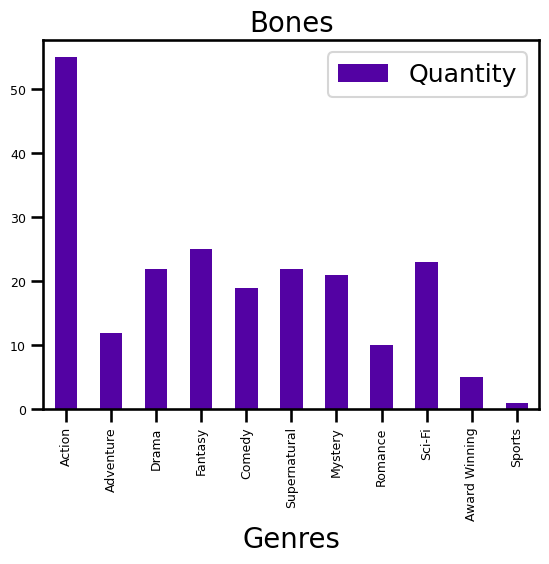

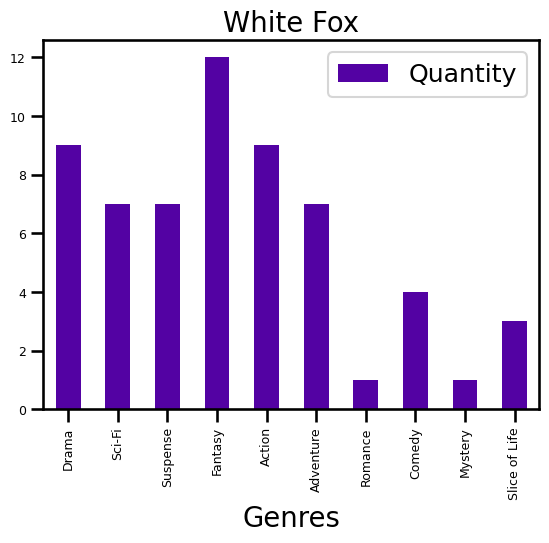

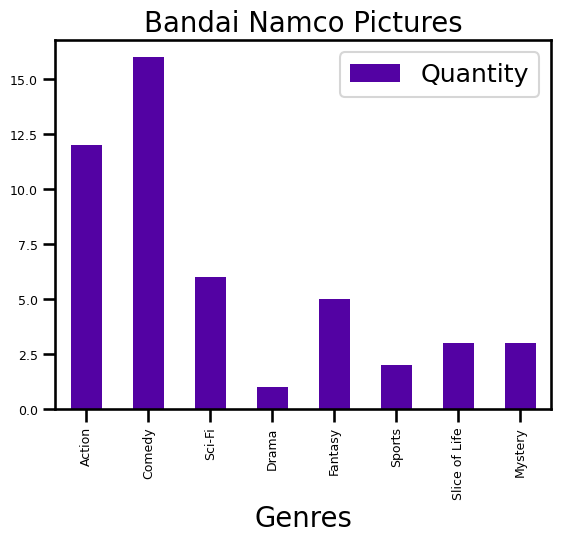

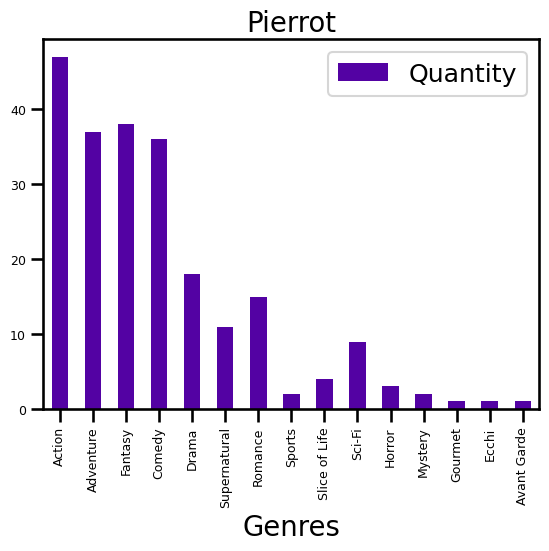

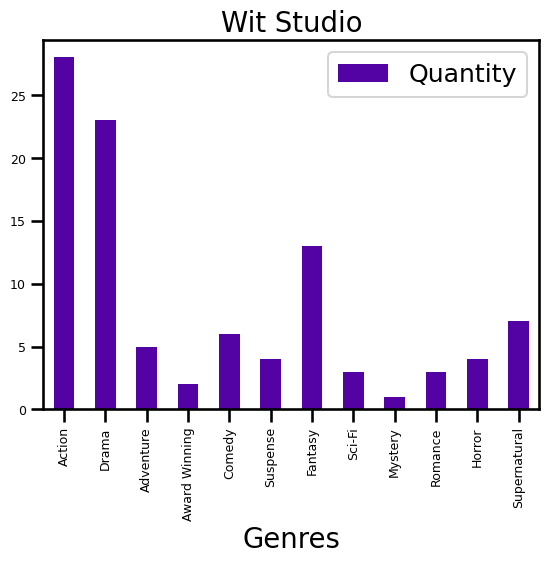

In [ ]:
genre_studio = {'Bones': {'Action': 53, 'Adventure': 10, 'Drama': 22, 'Fantasy': 25, 'Comedy': 22, 'Supernatural': 22, 'Mystery': 21, 'Romance': 10, 'Sci-Fi': 23, 'Award Winning': 5, 'Sports': 1}, 'White Fox': {'Drama': 9, 'Sci-Fi': 7, 'Suspense': 7, 'Fantasy': 12, 'Action': 9, 'Adventure': 7, 'Romance': 1, 'Comedy': 4, 'Mystery': 1, 'Slice of Life': 3}, 'Bandai Namco Pictures': {'Action': 12, 'Comedy': 16, 'Sci-Fi': 6, 'Drama': 1, 'Fantasy': 4, 'Sports': 2, 'Slice of Life': 3, 'Mystery': 3, 'Supernatural': 1}, 'Pierrot': {'Action': 47, 'Adventure': 37, 'Fantasy': 37, 'Comedy': 37, 'Drama': 18, 'Supernatural': 12, 'Romance': 15, 'Sports': 2, 'Slice of Life': 4, 'Sci-Fi': 9, 'Horror': 3, 'Mystery': 2, 'Gourmet': 1, 'Ecchi': 1, 'Avant Garde': 1}, 'Wit Studio': {'Action': 28, 'Drama': 23, 'Adventure': 5, 'Award Winning': 2, 'Comedy': 6, 'Suspense': 4, 'Fantasy': 12, 'Sci-Fi': 3, 'Mystery': 1, 'Romance': 3, 'Horror': 4, 'Supernatural': 7}, 'Sunrise': {'Action': 98, 'Comedy': 41, 'Sci-Fi': 95, 'Award Winning': 12, 'Drama': 48, 'Romance': 19, 'Adventure': 29, 'Fantasy': 16, 'Mystery': 14, 'Slice of Life': 15, 'Gourmet': 2, 'Supernatural': 5, 'Sports': 2, 'Girls Love': 1, 'Avant Garde': 1, 'Ecchi': 1}, 'A-1 Pictures': {'Comedy': 44, 'Romance': 17, 'Drama': 16, 'Action': 42, 'Sci-Fi': 13, 'Supernatural': 14, 'Mystery': 7, 'Suspense': 1, 'Boys Love': 1, 'Fantasy': 39, 'Horror': 1, 'Adventure': 21, 'Sports': 3, 'Slice of Life': 5, 'Ecchi': 5}, 'Madhouse': {'Action': 44, 'Adventure': 35, 'Fantasy': 35, 'Drama': 51, 'Mystery': 13, 'Suspense': 12, 'Sports': 16, 'Supernatural': 12, 'Award Winning': 14, 'Comedy': 33, 'Romance': 28, 'Avant Garde': 3, 'Horror': 8, 'Sci-Fi': 27, 'Ecchi': 2, 'Slice of Life': 9, 'Gourmet': 1, 'Girls Love': 1}, 'MAPPA': {'Action': 22, 'Drama': 11, 'Suspense': 3, 'Adventure': 12, 'Fantasy': 14, 'Award Winning': 4, 'Sports': 4, 'Romance': 1, 'Supernatural': 6, 'Mystery': 1, 'Comedy': 6, 'Horror': 1, 'Gourmet': 1, 'Sci-Fi': 1}, 'K-Factory': {'Drama': 3, 'Sci-Fi': 3, 'Action': 2}, 'Kitty Film Mitaka Studio': {'Drama': 2, 'Sci-Fi': 3, 'Action': 2, 'Comedy': 1, 'Romance': 1}, 'TMS Entertainment': {'Drama': 16, 'Romance': 20, 'Supernatural': 7, 'Comedy': 55, 'Fantasy': 8, 'Adventure': 51, 'Mystery': 51, 'Sci-Fi': 8, 'Sports': 17, 'Action': 24, 'Award Winning': 2, 'Slice of Life': 2, 'Ecchi': 1, 'Gourmet': 1, 'Horror': 1, 'Suspense': 1}, 'Kyoto Animation': {'Award Winning': 8, 'Drama': 23, 'Romance': 15, 'Supernatural': 6, 'Fantasy': 17, 'Mystery': 4, 'Sci-Fi': 2, 'Comedy': 27, 'Slice of Life': 9, 'Action': 7, 'Sports': 13, 'Adventure': 1}, 'Shaft': {'Drama': 13, 'Comedy': 42, 'Mystery': 20, 'Supernatural': 20, 'Action': 6, 'Romance': 16, 'Award Winning': 2, 'Suspense': 4, 'Slice of Life': 10, 'Ecchi': 5, 'Adventure': 3, 'Fantasy': 3, 'Sci-Fi': 1}, 'CoMix Wave Films': {'Award Winning': 4, 'Drama': 7, 'Supernatural': 1, 'Adventure': 2, 'Fantasy': 4, 'Romance': 5, 'Sci-Fi': 1, 'Slice of Life': 3, 'Boys Love': 1}, 'Doga Kobo': {'Drama': 3, 'Supernatural': 7, 'Comedy': 21, 'Fantasy': 3, 'Romance': 8, 'Sci-Fi': 2, 'Girls Love': 5, 'Award Winning': 1, 'Action': 3, 'Gourmet': 1, 'Slice of Life': 3}, 'CloverWorks': {'Comedy': 6, 'Drama': 7, 'Romance': 9, 'Supernatural': 6, 'Action': 6, 'Award Winning': 1, 'Fantasy': 8, 'Mystery': 4, 'Sci-Fi': 2, 'Suspense': 1, 'Boys Love': 2, 'Slice of Life': 1, 'Adventure': 1}, 'Toei Animation': {'Award Winning': 3, 'Sports': 12, 'Action': 81, 'Adventure': 71, 'Fantasy': 86, 'Horror': 3, 'Mystery': 6, 'Supernatural': 5, 'Sci-Fi': 29, 'Comedy': 51, 'Drama': 40, 'Romance': 24, 'Slice of Life': 3, 'Ecchi': 2, 'Gourmet': 1}, 'DandeLion Animation Studio': {'Award Winning': 1, 'Sports': 1, 'Adventure': 1, 'Comedy': 1}, 'Studio Signpost': {'Action': 2, 'Comedy': 1}, 'ufotable': {'Action': 27, 'Fantasy': 21, 'Supernatural': 18, 'Drama': 4, 'Mystery': 10, 'Romance': 5, 'Suspense': 8, 'Award Winning': 1, 'Gourmet': 1, 'Slice of Life': 2, 'Adventure': 3, 'Comedy': 1}, 'Production I.G': {'Sports': 43, 'Avant Garde': 2, 'Drama': 35, 'Sci-Fi': 44, 'Action': 43, 'Mystery': 27, 'Award Winning': 11, 'Slice of Life': 2, 'Suspense': 12, 'Fantasy': 16, 'Adventure': 10, 'Romance': 17, 'Comedy': 24, 'Supernatural': 13, 'Horror': 1}, 'Studio Ghibli': {'Adventure': 10, 'Award Winning': 14, 'Supernatural': 2, 'Action': 2, 'Fantasy': 9, 'Drama': 11, 'Romance': 7, 'Sci-Fi': 2, 'Comedy': 2, 'Mystery': 1}, 'Artland': {'Adventure': 6, 'Mystery': 6, 'Slice of Life': 6, 'Supernatural': 6, 'Action': 1, 'Comedy': 3}, 'Studio Deen': {'Drama': 40, 'Action': 38, 'Romance': 29, 'Adventure': 15, 'Comedy': 51, 'Fantasy': 22, 'Boys Love': 16, 'Horror': 7, 'Mystery': 11, 'Supernatural': 29, 'Girls Love': 8, 'Sci-Fi': 6, 'Avant Garde': 1, 'Slice of Life': 1, 'Sports': 1, 'Suspense': 1, 'Ecchi': 5}, 'Tokyo Movie Shinsha': {'Drama': 6, 'Sports': 2, 'Romance': 1, 'Action': 11, 'Mystery': 9, 'Adventure': 12, 'Horror': 1, 'Sci-Fi': 2, 'Supernatural': 1, 'Award Winning': 1, 'Comedy': 8, 'Fantasy': 1, 'Suspense': 1}, 'Studio Bind': {'Drama': 5, 'Fantasy': 5, 'Ecchi': 5, 'Comedy': 1}, 'LAN Studio': {'Drama': 3, 'Supernatural': 3}, 'OLM': {'Award Winning': 2, 'Mystery': 3, 'Action': 19, 'Adventure': 18, 'Drama': 7, 'Fantasy': 21, 'Horror': 2, 'Supernatural': 2, 'Suspense': 1, 'Comedy': 18, 'Sports': 5, 'Gourmet': 1, 'Slice of Life': 1, 'Sci-Fi': 2}, 'P.I.C.S.': {'Award Winning': 1, 'Mystery': 1}, 'Kinema Citrus': {'Adventure': 6, 'Drama': 9, 'Fantasy': 7, 'Mystery': 5, 'Sci-Fi': 5, 'Slice of Life': 3, 'Romance': 1, 'Award Winning': 1, 'Action': 1, 'Comedy': 2}, "Brain's Base": {'Drama': 12, 'Slice of Life': 11, 'Supernatural': 16, 'Action': 9, 'Comedy': 17, 'Mystery': 6, 'Adventure': 7, 'Fantasy': 2, 'Romance': 7, 'Award Winning': 2, 'Avant Garde': 1, 'Horror': 2, 'Sci-Fi': 3, 'Suspense': 1}, 'Gainax': {'Action': 14, 'Adventure': 4, 'Award Winning': 5, 'Sci-Fi': 12, 'Avant Garde': 3, 'Drama': 7, 'Suspense': 1, 'Comedy': 13, 'Supernatural': 2, 'Ecchi': 3, 'Romance': 2, 'Fantasy': 1, 'Horror': 1, 'Slice of Life': 1}, 'Shuka': {'Drama': 7, 'Slice of Life': 7, 'Supernatural': 12, 'Action': 7, 'Mystery': 6}, 'Tatsunoko Production': {'Award Winning': 2, 'Drama': 4, 'Sports': 3, 'Action': 11, 'Avant Garde': 1, 'Sci-Fi': 10, 'Suspense': 2, 'Comedy': 7, 'Romance': 4, 'Slice of Life': 2, 'Adventure': 4, 'Supernatural': 3, 'Fantasy': 2}, 'David Production': {'Action': 14, 'Adventure': 8, 'Supernatural': 14, 'Drama': 3, 'Sci-Fi': 5, 'Mystery': 2, 'Comedy': 7, 'Romance': 3, 'Sports': 1, 'Ecchi': 1, 'Gourmet': 1}, 'Khara': {'Action': 5, 'Award Winning': 3, 'Drama': 4, 'Sci-Fi': 6, 'Suspense': 1, 'Adventure': 1, 'Fantasy': 2, 'Avant Garde': 1, 'Supernatural': 1, 'Ecchi': 1}, 'Trigger': {'Action': 9, 'Sci-Fi': 6, 'Comedy': 6, 'Ecchi': 3, 'Adventure': 4, 'Fantasy': 5, 'Drama': 1, 'Romance': 1, 'Avant Garde': 1, 'Supernatural': 1}, 'Studio Chizu': {'Award Winning': 1, 'Fantasy': 4, 'Slice of Life': 1, 'Adventure': 2, 'Drama': 2}, 'Studio VOLN': {'Drama': 1, 'Romance': 1, 'Action': 2, 'Adventure': 2, 'Comedy': 2, 'Supernatural': 2}, 'C-Station': {'Slice of Life': 7, 'Comedy': 1}, 'J.C.Staff': {'Comedy': 70, 'Drama': 31, 'Romance': 47, 'Adventure': 21, 'Fantasy': 44, 'Supernatural': 15, 'Action': 30, 'Award Winning': 2, 'Mystery': 3, 'Sci-Fi': 16, 'Gourmet': 8, 'Ecchi': 14, 'Slice of Life': 6, 'Horror': 1, 'Avant Garde': 2, 'Girls Love': 1, 'Suspense': 3, 'Sports': 1, 'Boys Love': 1}, 'Manglobe': {'Action': 4, 'Adventure': 2, 'Comedy': 6, 'Romance': 4, 'Supernatural': 6, 'Mystery': 1, 'Sci-Fi': 1, 'Drama': 2}, 'Shin-Ei Animation': {'Comedy': 40, 'Romance': 2, 'Sci-Fi': 10, 'Adventure': 22, 'Fantasy': 15, 'Slice of Life': 5, 'Ecchi': 2, 'Award Winning': 4, 'Drama': 2, 'Action': 2, 'Mystery': 1}, 'Lerche': {'Action': 11, 'Comedy': 12, 'Boys Love': 3, 'Drama': 5, 'Romance': 3, 'Suspense': 2, 'Adventure': 3, 'Award Winning': 1, 'Mystery': 5, 'Sci-Fi': 1, 'Supernatural': 6, 'Fantasy': 6, 'Slice of Life': 5, 'Horror': 3, 'Girls Love': 1}, 'Nexus': {'Action': 3, 'Comedy': 3, 'Fantasy': 3, 'Romance': 1, 'Ecchi': 1, 'Slice of Life': 1}, 'Hal Film Maker': {'Fantasy': 8, 'Sci-Fi': 7, 'Slice of Life': 7, 'Comedy': 7, 'Drama': 2, 'Mystery': 1, 'Romance': 2, 'Action': 2, 'Adventure': 2}, 'B.CMAY PICTURES': {'Action': 6, 'Adventure': 4, 'Drama': 3, 'Fantasy': 6, 'Mystery': 3, 'Comedy': 2}, 'Geno Studio': {'Action': 4, 'Adventure': 4}, 'Zero-G': {'Comedy': 5, 'Slice of Life': 2, 'Fantasy': 2, 'Action': 1, 'Supernatural': 1, 'Ecchi': 1, 'Romance': 3}, 'Egg Firm': {'Comedy': 4, 'Supernatural': 4}, 'Platinum Vision': {'Drama': 2, 'Romance': 2}, 'Nippon Animation': {'Action': 5, 'Adventure': 21, 'Fantasy': 9, 'Drama': 22, 'Slice of Life': 15, 'Sci-Fi': 4, 'Comedy': 12, 'Romance': 5, 'Gourmet': 1, 'Sports': 1, 'Mystery': 1, 'Suspense': 1}, 'P.A. Works': {'Drama': 16, 'Fantasy': 5, 'Award Winning': 2, 'Comedy': 9, 'Action': 2, 'Slice of Life': 5, 'Supernatural': 4, 'Romance': 3, 'Adventure': 1, 'Mystery': 3, 'Horror': 2, 'Sports': 1, 'Suspense': 1}, 'SynergySP': {'Sports': 6, 'Drama': 3, 'Romance': 3, 'Action': 4, 'Comedy': 3, 'Supernatural': 1}, 'Orange': {'Action': 3, 'Drama': 3, 'Fantasy': 1, 'Mystery': 1, 'Adventure': 1, 'Sci-Fi': 2}, '8bit': {'Action': 11, 'Adventure': 9, 'Comedy': 10, 'Fantasy': 11, 'Sports': 2, 'Award Winning': 1, 'Romance': 6, 'Sci-Fi': 5, 'Drama': 4, 'Slice of Life': 6, 'Girls Love': 1}, 'SILVER LINK.': {'Slice of Life': 11, 'Action': 9, 'Fantasy': 10, 'Drama': 3, 'Romance': 10, 'Supernatural': 5, 'Horror': 2, 'Mystery': 3, 'Comedy': 10, 'Adventure': 1, 'Ecchi': 3, 'Gourmet': 1, 'Sci-Fi': 1, 'Suspense': 1}, 'feel.': {'Comedy': 11, 'Romance': 9, 'Supernatural': 2, 'Slice of Life': 4, 'Drama': 1, 'Action': 1, 'Horror': 1}, 'Topcraft': {'Adventure': 1, 'Award Winning': 1, 'Fantasy': 1}, 'Satelight': {'Action': 20, 'Horror': 2, 'Supernatural': 2, 'Sci-Fi': 16, 'Award Winning': 2, 'Romance': 6, 'Adventure': 6, 'Fantasy': 9, 'Drama': 7, 'Comedy': 6, 'Sports': 1, 'Ecchi': 2, 'Slice of Life': 2, 'Mystery': 1}, 'Graphinica': {'Action': 5, 'Horror': 1, 'Supernatural': 2, 'Drama': 3, 'Fantasy': 3, 'Romance': 1, 'Sci-Fi': 3, 'Avant Garde': 1, 'Ecchi': 1}, 'Nippon Ramayana Film Co.': {'Adventure': 1}, 'Haoliners Animation League': {'Action': 4, 'Adventure': 3, 'Drama': 5, 'Supernatural': 11, 'Comedy': 11, 'Romance': 8, 'Boys Love': 2, 'Fantasy': 3, 'Mystery': 1, 'Sci-Fi': 1, 'Slice of Life': 1}, 'Xebec': {'Action': 26, 'Drama': 9, 'Sci-Fi': 24, 'Sports': 3, 'Fantasy': 8, 'Adventure': 7, 'Comedy': 14, 'Supernatural': 3, 'Award Winning': 1, 'Mystery': 1, 'Romance': 9, 'Ecchi': 6, 'Girls Love': 1, 'Horror': 1}, 'AIC': {'Action': 7, 'Drama': 2, 'Sci-Fi': 11, 'Comedy': 22, 'Romance': 18, 'Adventure': 2, 'Fantasy': 2, 'Ecchi': 1, 'Supernatural': 8}, 'TROYCA': {'Drama': 7, 'Girls Love': 1, 'Romance': 1, 'Action': 2, 'Fantasy': 3, 'Sci-Fi': 2, 'Mystery': 3, 'Supernatural': 2, 'Suspense': 1}, 'Gallop': {'Action': 7, 'Drama': 4, 'Adventure': 8, 'Comedy': 11, 'Romance': 5, 'Sports': 2, 'Fantasy': 7, 'Sci-Fi': 1, 'Mystery': 1}, 'Studio Comet': {'Action': 2, 'Drama': 2, 'Comedy': 7, 'Romance': 7, 'Sports': 3, 'Fantasy': 4}, 'Trans Arts': {'Drama': 1, 'Fantasy': 3, 'Sports': 3, 'Comedy': 3, 'Adventure': 2}, 'Marvy Jack': {'Adventure': 2, 'Fantasy': 2, 'Romance': 2}, 'Tezuka Productions': {'Drama': 6, 'Romance': 3, 'Action': 2, 'Adventure': 2, 'Supernatural': 1, 'Girls Love': 1, 'Mystery': 1, 'Suspense': 1, 'Comedy': 2, 'Ecchi': 1, 'Award Winning': 1}, 'Gonzo': {'Comedy': 11, 'Drama': 9, 'Romance': 9, 'Award Winning': 1, 'Mystery': 2, 'Sci-Fi': 9, 'Supernatural': 4, 'Suspense': 1, 'Fantasy': 4, 'Action': 17, 'Adventure': 8, 'Sports': 1, 'Gourmet': 1, 'Horror': 1, 'Slice of Life': 1, 'Ecchi': 2}, 'Mushi Production': {'Drama': 2, 'Sports': 1}, 'Sharefun Studio': {'Action': 4, 'Adventure': 2, 'Comedy': 4, 'Drama': 4, 'Mystery': 4, 'Romance': 1}, 'A.C.G.T.': {'Action': 5, 'Adventure': 3, 'Slice of Life': 1, 'Drama': 4, 'Fantasy': 2, 'Suspense': 1}, 'Nut': {'Action': 4, 'Fantasy': 3, 'Adventure': 1, 'Sci-Fi': 1}, 'Hololive Production': {'Comedy': 1}, 'Imagin': {'Adventure': 1, 'Fantasy': 1, 'Romance': 1}, 'Studio Hibari': {'Sports': 3, 'Boys Love': 1, 'Gourmet': 2, 'Slice of Life': 1, 'Drama': 3, 'Romance': 2, 'Adventure': 2, 'Comedy': 2, 'Fantasy': 1, 'Sci-Fi': 1}, 'Telescreen': {'Adventure': 3, 'Comedy': 2, 'Fantasy': 3, 'Slice of Life': 2, 'Drama': 1}, 'BUG FILMS': {'Action': 1, 'Comedy': 1, 'Horror': 1, 'Supernatural': 1, 'Suspense': 1}, 'LIDENFILMS': {'Comedy': 7, 'Slice of Life': 3, 'Romance': 5, 'Supernatural': 7, 'Action': 12, 'Drama': 6, 'Adventure': 4, 'Fantasy': 5, 'Mystery': 1, 'Sports': 1}, 'Studio 4°C': {'Action': 7, 'Adventure': 6, 'Drama': 6, 'Fantasy': 5, 'Horror': 5, 'Comedy': 3, 'Award Winning': 3, 'Supernatural': 2, 'Avant Garde': 1, 'Romance': 2, 'Sci-Fi': 2}, 'Science SARU': {'Comedy': 3, 'Mystery': 1, 'Romance': 3, 'Suspense': 1, 'Adventure': 2, 'Award Winning': 3, 'Fantasy': 1, 'Drama': 2, 'Action': 1, 'Avant Garde': 1, 'Horror': 1, 'Supernatural': 3}, 'Actas': {'Action': 6, 'Award Winning': 1, 'Mystery': 4, 'Drama': 1, 'Sci-Fi': 1, 'Slice of Life': 1}, 'Shirogumi': {'Comedy': 3, 'Sci-Fi': 2, 'Gourmet': 1, 'Supernatural': 1}, 'Yumeta Company': {'Action': 3, 'Adventure': 1, 'Comedy': 2, 'Drama': 4, 'Fantasy': 2, 'Romance': 2}, 'Pastel': {'Action': 3, 'Drama': 3}, 'CLAP': {'Comedy': 1, 'Drama': 2, 'Mystery': 1, 'Sci-Fi': 1}, 'Colored Pencil Animation': {'Action': 4}, 'Telecom Animation Film': {'Action': 9, 'Adventure': 9, 'Comedy': 5, 'Mystery': 4, 'Drama': 7, 'Fantasy': 2, 'Sci-Fi': 4, 'Slice of Life': 1, 'Romance': 2, 'Gourmet': 1, 'Supernatural': 1}, 'TYO Animations': {'Comedy': 12, 'Drama': 8, 'Slice of Life': 9, 'Girls Love': 3, 'Fantasy': 1, 'Sci-Fi': 1, 'Romance': 1}, 'Seven Arcs': {'Action': 6, 'Comedy': 12, 'Drama': 6, 'Sci-Fi': 2, 'Romance': 6, 'Ecchi': 1}, 'Ajia-do': {'Fantasy': 6, 'Action': 2, 'Adventure': 1, 'Comedy': 3, 'Drama': 1, 'Romance': 1, 'Slice of Life': 2, 'Sci-Fi': 1, 'Mystery': 1}, 'Sparkly Key Animation Studio': {'Action': 9, 'Adventure': 7, 'Fantasy': 9, 'Supernatural': 3, 'Romance': 1, 'Sci-Fi': 2}, 'Triangle Staff': {'Avant Garde': 1, 'Award Winning': 1, 'Drama': 2, 'Mystery': 1, 'Sci-Fi': 3, 'Supernatural': 1, 'Action': 1, 'Adventure': 1, 'Romance': 2}, 'Drive': {'Adventure': 1, 'Drama': 1, 'Supernatural': 1, 'Action': 1, 'Fantasy': 2, 'Comedy': 1}, 'Bibury Animation Studios': {'Comedy': 2, 'Romance': 2}, 'Studio Kai': {'Sports': 1, 'Drama': 1, 'Slice of Life': 1, 'Romance': 1, 'Action': 1, 'Mystery': 1, 'Supernatural': 1}, 'domerica': {'Comedy': 1, 'Romance': 1, 'Supernatural': 1}, 'SANZIGEN': {'Action': 5, 'Sci-Fi': 3, 'Comedy': 3, 'Adventure': 1, 'Drama': 1, 'Fantasy': 1}, 'APPP': {'Adventure': 3, 'Comedy': 1, 'Ecchi': 1, 'Action': 3, 'Horror': 1, 'Drama': 1, 'Supernatural': 1}, 'Motion Magic': {'Action': 11, 'Fantasy': 11, 'Adventure': 9, 'Romance': 5, 'Supernatural': 2}, 'E&G Films': {'Action': 3, 'Adventure': 4, 'Comedy': 3, 'Fantasy': 3, 'Romance': 1, 'Sci-Fi': 1}, 'Oh! Production': {'Award Winning': 1, 'Drama': 1}, 'Studio Rikka': {'Sci-Fi': 6, 'Slice of Life': 2, 'Adventure': 1, 'Award Winning': 1, 'Action': 1, 'Avant Garde': 1, 'Fantasy': 1, 'Supernatural': 1, 'Ecchi': 1, 'Drama': 1}, 'Bee Train': {'Action': 4, 'Drama': 3, 'Suspense': 1, 'Adventure': 2, 'Fantasy': 2, 'Romance': 2, 'Horror': 1, 'Mystery': 2, 'Supernatural': 1}, 'Group TAC': {'Drama': 8, 'Romance': 4, 'Sports': 4, 'Action': 4, 'Adventure': 7, 'Comedy': 8, 'Fantasy': 3, 'Award Winning': 2, 'Sci-Fi': 5, 'Supernatural': 1, 'Ecchi': 1, 'Mystery': 1, 'Slice of Life': 1}, 'Studio Gokumi': {'Drama': 7, 'Fantasy': 7, 'Slice of Life': 8, 'Comedy': 5, 'Romance': 2, 'Action': 1}, 'HMCH': {'Adventure': 1, 'Drama': 1, 'Fantasy': 4, 'Comedy': 4, 'Supernatural': 1}, 'Nomad': {'Comedy': 7, 'Supernatural': 3, 'Action': 3, 'Drama': 3, 'Sci-Fi': 1}, 'Radix': {'Drama': 1, 'Fantasy': 1, 'Mystery': 1}, 'Purple Cow Studio Japan': {'Adventure': 1, 'Award Winning': 1, 'Sci-Fi': 2, 'Action': 1, 'Comedy': 1, 'Supernatural': 1}, 'Studio Daisy': {'Suspense': 1, 'Fantasy': 1}, 'OTOIRO': {'Suspense': 1}, 'M.S.C': {'Sports': 8, 'Comedy': 1}, 'Lapin Track': {'Romance': 1, 'Fantasy': 2, 'Mystery': 1, 'Action': 1, 'Supernatural': 1}, 'Samsara Animation Studio': {'Action': 2, 'Fantasy': 2, 'Supernatural': 1}, 'Encourage Films': {'Slice of Life': 2, 'Boys Love': 1, 'Drama': 1, 'Romance': 1}, 'Square Enix Visual Works': {'Action': 4, 'Fantasy': 3, 'Drama': 1, 'Sci-Fi': 1}, 'Production IMS': {'Romance': 2, 'Action': 2, 'Sci-Fi': 1}, 'Shenman Entertainment': {'Action': 3, 'Adventure': 3, 'Fantasy': 3}, 'Animation Do': {'Comedy': 3, 'Slice of Life': 1, 'Sports': 7}, 'Hoods Entertainment': {'Action': 4, 'Adventure': 4, 'Comedy': 4, 'Fantasy': 4, 'Romance': 3, 'Mystery': 1, 'Ecchi': 1}, 'T-Rex': {'Hentai': 17, 'Fantasy': 2, 'Supernatural': 1, 'Sports': 1}, 'Tokyo Kids': {'Action': 1, 'Drama': 1, 'Sci-Fi': 1, 'Mystery': 1}, 'Minami Machi Bugyousho': {'Action': 1, 'Drama': 1, 'Sci-Fi': 1, 'Mystery': 1}, 'Flat Studio': {'Supernatural': 1, 'Drama': 1}, 'Studio 1st': {'Hentai': 2}, 'AHA Entertainment': {'Action': 2, 'Adventure': 1, 'Comedy': 2, 'Drama': 2, 'Mystery': 2, 'Romance': 1}, 'GoHands': {'Comedy': 7, 'Action': 10, 'Fantasy': 3, 'Supernatural': 5, 'Sci-Fi': 3, 'Mystery': 1, 'Drama': 1}, 'Pierrot Plus': {'Action': 5, 'Comedy': 7, 'Supernatural': 5, 'Adventure': 2, 'Fantasy': 2}, 'CygamesPictures': {'Sports': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1, 'Gourmet': 1}, 'Lay-duce': {'Comedy': 4, 'Romance': 3, 'Action': 3, 'Adventure': 2, 'Fantasy': 3, 'Girls Love': 1, 'Drama': 2}, 'Fenz': {'Comedy': 3, 'Fantasy': 3}, 'NAZ': {'Mystery': 1, 'Sci-Fi': 1, 'Suspense': 1}, 'AIC ASTA': {'Comedy': 7, 'Adventure': 5, 'Fantasy': 5, 'Romance': 3, 'Sci-Fi': 6, 'Ecchi': 3, 'Action': 4, 'Supernatural': 4, 'Mystery': 3, 'Drama': 2, 'Sports': 1}, 'AtelierPontdarc': {'Comedy': 1, 'Fantasy': 1}, 'Studio Massket': {'Action': 1, 'Sci-Fi': 1}, 'Marza Animation Planet': {'Action': 2, 'Adventure': 1, 'Comedy': 1, 'Mystery': 1, 'Drama': 1, 'Sci-Fi': 1}, 'HORNETS': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1}, 'Project No.9': {'Romance': 3, 'Action': 1, 'Comedy': 1, 'Drama': 1}, 'Fanworks': {'Comedy': 10, 'Slice of Life': 5, 'Romance': 1}, 'Nice Boat Animation': {'Action': 1, 'Fantasy': 1}, 'Phoenix Entertainment': {'Action': 1, 'Drama': 1, 'Sci-Fi': 1}, 'Anpro': {'Action': 1, 'Adventure': 1, 'Drama': 1, 'Fantasy': 1}, 'production doA': {'Slice of Life': 2}, 'Geek Toys': {'Action': 4, 'Romance': 1, 'Sci-Fi': 3, 'Fantasy': 1, 'Supernatural': 1}, 'Gaina': {'Slice of Life': 1, 'Drama': 2}, 'Frontier One': {}, 'Arms': {'Action': 2, 'Adventure': 1, 'Drama': 2, 'Fantasy': 1, 'Comedy': 1, 'Horror': 1, 'Romance': 1, 'Supernatural': 1}, 'Daume': {'Horror': 2, 'Mystery': 2, 'Supernatural': 2, 'Suspense': 2, 'Comedy': 5, 'Slice of Life': 4, 'Romance': 1, 'Sci-Fi': 1, 'Ecchi': 1}, 'DMM.futureworks': {'Comedy': 2}, 'Ascension': {'Award Winning': 1, 'Drama': 1, 'Slice of Life': 1, 'Supernatural': 1}, 'PINE JAM': {'Drama': 1, 'Comedy': 2, 'Romance': 1, 'Fantasy': 1, 'Slice of Life': 1}, 'Studio Kafka': {'Drama': 2, 'Fantasy': 2, 'Romance': 1}, 'Djinn Power': {'Comedy': 1, 'Drama': 1, 'Fantasy': 1}, 'AIC Spirits': {'Action': 3, 'Comedy': 1, 'Fantasy': 1, 'Ecchi': 2, 'Supernatural': 1, 'Suspense': 1, 'Sci-Fi': 1}, 'BeSTACK': {'Action': 1, 'Comedy': 1, 'Fantasy': 1, 'Ecchi': 1}, 'Imagineer': {'Comedy': 2, 'Slice of Life': 2}, '10Gauge': {'Romance': 1}, 'Studio DURIAN': {'Romance': 1}, 'Polygon Pictures': {'Action': 6, 'Sci-Fi': 3, 'Horror': 3, 'Mystery': 3, 'Supernatural': 3, 'Fantasy': 1}, 'Okuruto Noboru': {'Suspense': 1}, 'Passione': {'Comedy': 3, 'Fantasy': 2, 'Erotica': 1, 'Horror': 1, 'Supernatural': 1, 'Action': 1, 'Adventure': 1, 'Mystery': 1}, 'C2C': {'Action': 2, 'Adventure': 3, 'Comedy': 4, 'Fantasy': 5, 'Drama': 1, 'Romance': 1, 'Sci-Fi': 1, 'Slice of Life': 1, 'Supernatural': 1}, 'Zexcs': {'Girls Love': 1, 'Romance': 4, 'Gourmet': 1, 'Slice of Life': 1, 'Sports': 2, 'Award Winning': 1, 'Drama': 2, 'Action': 2, 'Adventure': 2, 'Fantasy': 3, 'Sci-Fi': 1}, 'Collaboration Works': {'Hentai': 4}, 'AIC Classic': {'Drama': 2, 'Romance': 1}, 'Studio 3Hz': {'Action': 1, 'Mystery': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 2, 'Sci-Fi': 1, 'Slice of Life': 1, 'Drama': 1}, 'W-Toon Studio': {'Comedy': 1}, 'Visual 80': {'Adventure': 1, 'Comedy': 1, 'Fantasy': 1}, 'Studio Blanc.': {'Comedy': 1}, 'LIDENFILMS Kyoto Studio': {'Slice of Life': 1, 'Comedy': 1}, 'Larx Entertainment': {'Action': 2}, 'Seven': {'Hentai': 6, 'Fantasy': 1, 'Comedy': 2, 'Romance': 2}, 'dwarf': {}, 'Bridge': {'Comedy': 4, 'Slice of Life': 3, 'Action': 3, 'Adventure': 2, 'Fantasy': 3, 'Avant Garde': 1, 'Sci-Fi': 1, 'Supernatural': 1, 'Ecchi': 1}, 'Yokohama Animation Lab': {'Fantasy': 2, 'Comedy': 1, 'Action': 1, 'Adventure': 1}, 'Bee Media': {'Action': 1, 'Drama': 1}, 'Code': {'Action': 1, 'Drama': 1}, 'Enishiya': {'Romance': 1}, 'ABJ COMPANY': {'Boys Love': 1, 'Drama': 1, 'Romance': 1}, 'Rabbit Machine': {}, 'Palm Studio': {'Comedy': 1, 'Slice of Life': 1, 'Drama': 2, 'Gourmet': 1, 'Adventure': 1, 'Sci-Fi': 1}, 'Magic Bus': {'Action': 2, 'Comedy': 4, 'Drama': 2, 'Slice of Life': 1, 'Adventure': 3, 'Romance': 1, 'Sci-Fi': 2}, 'I.Gzwei': {'Action': 6, 'Drama': 6, 'Sci-Fi': 6}, 'DC Impression Vision': {'Action': 2, 'Adventure': 1, 'Fantasy': 2, 'Sci-Fi': 1}, 'studio MOTHER': {'Romance': 1}, 'asread.': {'Action': 2, 'Supernatural': 3, 'Suspense': 2, 'Comedy': 3, 'Slice of Life': 3}, 'Studio Moriken': {'Comedy': 1}, 'Connect': {'Comedy': 3, 'Romance': 2, 'Slice of Life': 1, 'Action': 1, 'Supernatural': 1, 'Suspense': 1}, 'Ezόla': {'Drama': 1}, 'The Answer Studio': {'Romance': 2, 'Action': 1, 'Adventure': 1, 'Drama': 2, 'Suspense': 1}, 'Studio Colorido': {'Fantasy': 4, 'Mystery': 1, 'Sci-Fi': 2, 'Action': 2, 'Adventure': 2, 'Comedy': 3, 'Award Winning': 1, 'Drama': 2, 'Romance': 1, 'Supernatural': 2, 'Avant Garde': 1, 'Ecchi': 1, 'Slice of Life': 1}, 'Studio Pastoral': {'Action': 1, 'Adventure': 2, 'Supernatural': 2, 'Ecchi': 2, 'Comedy': 1, 'Romance': 1}, 'Dongwoo A&E': {'Sports': 1, 'Slice of Life': 1}, 'Fuji TV': {'Comedy': 1, 'Romance': 1}, 'October Media': {'Action': 1, 'Comedy': 1, 'Drama': 1, 'Fantasy': 1}, 'Yaoyorozu': {'Adventure': 1, 'Award Winning': 1, 'Comedy': 1, 'Fantasy': 1}, 'Signal.MD': {'Comedy': 2, 'Romance': 3}, 'Foch Films': {'Action': 7, 'Adventure': 4, 'Fantasy': 7, 'Romance': 3}, 'FILMONY': {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1}, 'AXsiZ': {'Comedy': 2, 'Slice of Life': 2}, 'Grouper Productions': {'Comedy': 1, 'Ecchi': 1}, 'Red Dog Culture House': {'Drama': 1, 'Romance': 2, 'Slice of Life': 1}, 'Seven Arcs Pictures': {'Action': 5, 'Comedy': 3, 'Drama': 2, 'Sci-Fi': 1, 'Fantasy': 3, 'Romance': 2, 'Ecchi': 3}, 'DLE': {'Award Winning': 1, 'Comedy': 3, 'Slice of Life': 1, 'Supernatural': 1}, 'Studio PuYUKAI': {'Fantasy': 5, 'Comedy': 4}, 'Big Firebird Culture': {'Action': 2, 'Adventure': 1, 'Comedy': 2, 'Fantasy': 2, 'Drama': 1, 'Romance': 1}, 'Kamikaze Douga': {'Comedy': 3, 'Avant Garde': 2, 'Action': 1, 'Fantasy': 1, 'Sci-Fi': 1, 'Supernatural': 1, 'Ecchi': 1}, 'Space Neko Company': {'Comedy': 1}, 'Diomedéa': {'Fantasy': 4, 'Girls Love': 1, 'Action': 2, 'Drama': 1, 'Sci-Fi': 1, 'Comedy': 8, 'Romance': 2, 'Sports': 1}, 'Typhoon Graphics': {'Fantasy': 1, 'Romance': 1}, 'Studio Eromatick': {'Hentai': 3}, 'L²Studio': {'Action': 1, 'Supernatural': 3, 'Comedy': 2, 'Slice of Life': 1}, 'Studio Mir': {'Action': 1, 'Drama': 1, 'Supernatural': 1}, 'Tryforce': {'Hentai': 1}, 'TNK': {'Action': 6, 'Comedy': 8, 'Fantasy': 6, 'Romance': 7, 'Ecchi': 8}, 'Sunrise Beyond': {'Action': 1, 'Sci-Fi': 1}, 'Paper Plane Animation Studio': {'Comedy': 1, 'Romance': 1}, 'B&T': {'Adventure': 1, 'Drama': 1, 'Romance': 1, 'Supernatural': 1}, 'Original Force': {'Action': 2, 'Adventure': 2, 'Fantasy': 2}, 'Wonder Cat Animation': {'Action': 2, 'Adventure': 2, 'Fantasy': 2}, 'Majin': {'Fantasy': 4, 'Hentai': 4, 'Action': 1, 'Supernatural': 1}, 'Twin Engine': {}, 'Ruo Hong Culture': {'Action': 7, 'Adventure': 6, 'Fantasy': 7, 'Romance': 6, 'Drama': 1}, 'Ashi Productions': {'Action': 2, 'Adventure': 2, 'Comedy': 2, 'Fantasy': 1}, 'Bakken Record': {'Romance': 1, 'Sci-Fi': 1}, 'Venet': {'Boys Love': 1, 'Drama': 1, 'Romance': 1, 'Erotica': 1}, 'Picture Magic': {'Slice of Life': 1}, 'Millepensee': {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1, 'Mystery': 1}, 'TriF Studio': {'Romance': 1}, 'Life Work': {'Action': 1, 'Comedy': 1}, 'Light Chaser Animation Studios': {'Action': 1, 'Adventure': 2, 'Drama': 1, 'Fantasy': 2, 'Romance': 1}, 'Ordet': {'Action': 2, 'Comedy': 2, 'Fantasy': 2}, 'Tonari Animation': {'Comedy': 1, 'Fantasy': 1}, 'Digital Frontier': {'Action': 2, 'Drama': 1, 'Horror': 1, 'Sci-Fi': 2}, 'JCF': {'Comedy': 1, 'Drama': 1}, 'Peak Hunt': {'Supernatural': 1, 'Hentai': 1}, 'GRIZZLY': {'Boys Love': 2, 'Drama': 2, 'Erotica': 1}, 'Sublimation': {'Romance': 1}, 'HuaMei Animation': {'Comedy': 1}, 'Marone': {'Romance': 1}, 'Pb Animation Co. Ltd.': {'Adventure': 2, 'Comedy': 2, 'Fantasy': 2}, 'Eiken': {'Sports': 1, 'Drama': 1, 'Romance': 1}, 'Studio Junio': {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Drama': 1, 'Romance': 1, 'Sci-Fi': 1}, 'Kaname Productions': {'Action': 1, 'Adventure': 1, 'Sci-Fi': 1}, 'Animation 21': {'Comedy': 1, 'Sports': 1}, 'Sunflowers': {'Action': 1, 'Adventure': 1}, 'd00r works': {'Mystery': 1}, 'Office Takeout': {'Hentai': 1}, 'Flavors Soft': {'Hentai': 1}, 'Maboroshi Koubou': {'Hentai': 1}, 'Silver': {'Comedy': 4, 'Romance': 4}, 'Arvo Animation': {'Comedy': 4, 'Romance': 4, 'Fantasy': 1, 'Sci-Fi': 1}, 'Studio Palette': {'Action': 1, 'Drama': 1, 'Fantasy': 1, 'Mystery': 1, 'Romance': 1}, 'Production Reed': {'Drama': 1, 'Romance': 2, 'Comedy': 1}, 'WAO World': {'Drama': 1, 'Romance': 1}, 'Jumondo': {'Hentai': 1}, 'Tear Studio': {'Comedy': 1}, 'Garden Culture': {'Comedy': 1, 'Drama': 1, 'Romance': 1, 'Supernatural': 1}, 'Japan Taps': {'Drama': 1}, 'LICO': {'Romance': 1, 'Slice of Life': 1}, 'Odolttogi': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1}, 'Tsuchida Productions': {'Sports': 1}, 'ENGI': {'Fantasy': 1}, 'AIC Build': {'Comedy': 2, 'Romance': 2, 'Ecchi': 1}, 'Liber': {'Comedy': 1, 'Fantasy': 1, 'Romance': 1}, 'New Generation': {'Hentai': 1}, 'Sola Digital Arts': {'Action': 1, 'Avant Garde': 1, 'Fantasy': 1, 'Sci-Fi': 1, 'Supernatural': 1, 'Ecchi': 1}, "Steve N' Steven": {'Action': 1, 'Avant Garde': 1, 'Fantasy': 1, 'Sci-Fi': 1, 'Supernatural': 1, 'Ecchi': 1}, 'Azeta Pictures': {'Action': 1, 'Adventure': 1}, 'Studio GOONEYS': {'Adventure': 1, 'Comedy': 1}, 'Pancake': {'Adventure': 1, 'Comedy': 1}, 'Mimoid': {'Adventure': 1, 'Comedy': 1}, 'team Yamahitsuji': {'Adventure': 1, 'Comedy': 1}, 'Mili Pictures': {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Romance': 1}, 'Artmic': {'Adventure': 1, 'Sci-Fi': 1}, 'AIC PLUS+': {'Romance': 1, 'Sci-Fi': 1}, 'High Energy Studio': {'Action': 1, 'Fantasy': 1}, 'Felix Film': {'Comedy': 1, 'Romance': 1}, 'Wawayu Animation': {'Adventure': 1, 'Comedy': 3, 'Drama': 3, 'Gourmet': 3, 'Romance': 3}, 'Karaku': {'Drama': 1, 'Romance': 1, 'Sports': 1, 'Supernatural': 1}, 'Studio M2': {'Action': 1, 'Drama': 1}, 'Square Pictures': {'Action': 1, 'Drama': 1, 'Sci-Fi': 1}, 'CG Year': {'Action': 2, 'Fantasy': 2, 'Adventure': 1}, 'Calf Studio': {}, 'monofilmo': {'Boys Love': 1, 'Comedy': 1, 'Slice of Life': 1}, 'KJJ Animation': {'Action': 1, 'Comedy': 1, 'Drama': 1, 'Fantasy': 1, 'Romance': 1}, 'Planet Cartoon': {'Comedy': 1}, 'Fever Creations': {'Comedy': 1}, 'Cloud Art': {'Adventure': 1, 'Fantasy': 1}, 'Cafe de Jeilhouse': {'Hentai': 1}, 'Minakata Laboratory': {}, 'EMT Squared': {'Adventure': 1, 'Comedy': 1, 'Fantasy': 1}, 'KSS': {'Adventure': 1, 'Award Winning': 1, 'Drama': 1, 'Fantasy': 1, 'Romance': 1}, 'Japan Vistec': {'Action': 1, 'Adventure': 1, 'Sci-Fi': 1}, 'KeyEast': {'Drama': 1, 'Romance': 1}, 'REALTHING': {'Drama': 1, 'Romance': 1}, 'Beijing Enlight Pictures': {'Action': 1, 'Adventure': 1, 'Fantasy': 1}, 'Studio Ponoc': {'Adventure': 1, 'Fantasy': 1}}

genre_studio_df = pd.DataFrame(list(genre_studio.items()), columns=['Studio', 'Genre'])

# código com os gráficos e nomes dos estúdios
 
list_anime_studios = list(genres_studio.keys())[:5]

sns.set_palette("plasma")

for studio_name in list_anime_studios:
    genre_names = list(genres_studio[studio_name].keys())
    genre_values = list(genres_studio[studio_name].values())
    #add csv file to dataframe
    df = pd.DataFrame({'Genres': genre_names, 'Quantity': genre_values})

    #create bar graph
    bargraph = df.plot.bar(x = 'Genres', y = 'Quantity', fontsize = '9')
    
    bargraph.set_title(studio_name)



plt.savefig('studioxgenre.png', transparent=True, dpi=300)  # Save with transparency and 300 DPI resolution
plt.show()

<Figure size 640x480 with 0 Axes>

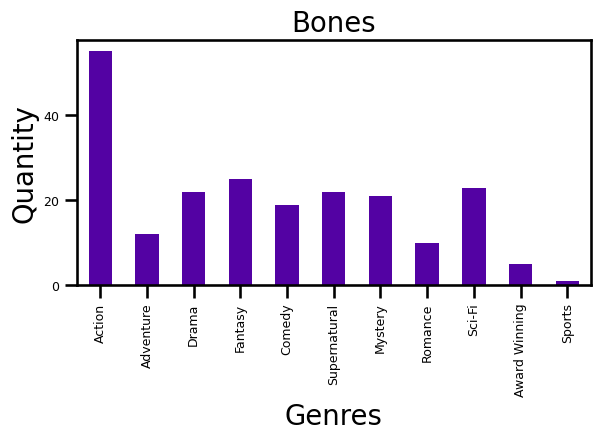

<Figure size 640x480 with 0 Axes>

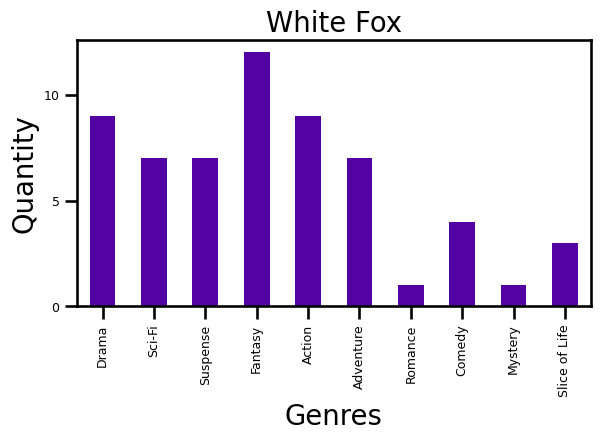

<Figure size 640x480 with 0 Axes>

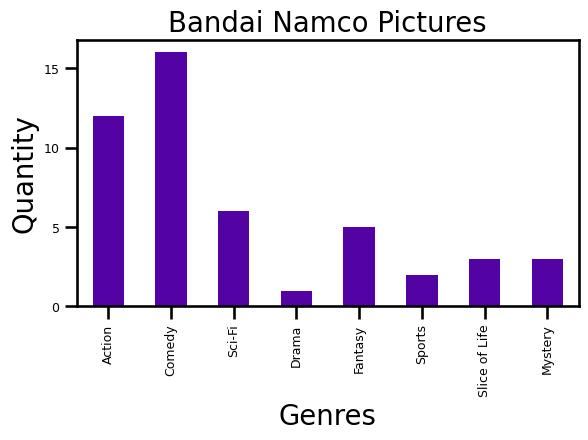

<Figure size 640x480 with 0 Axes>

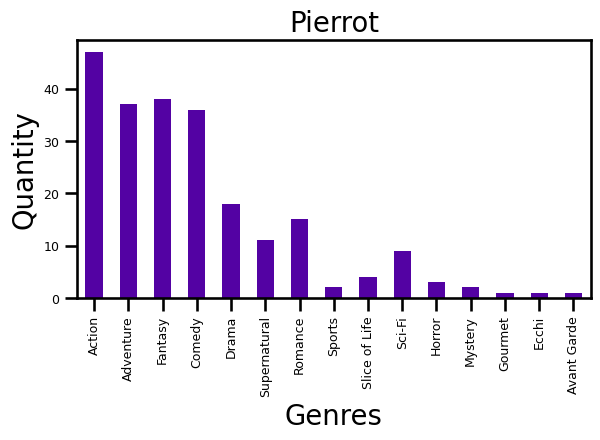

<Figure size 640x480 with 0 Axes>

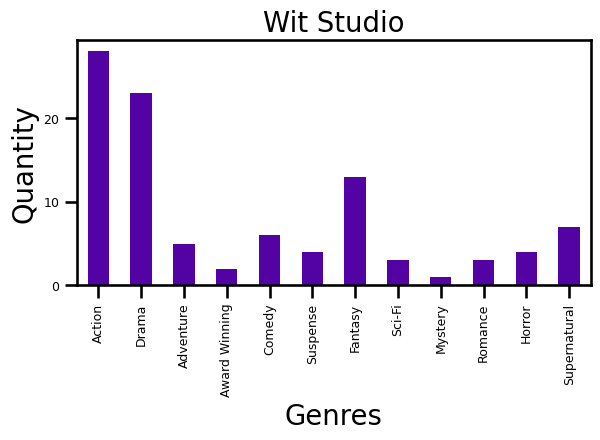

In [ ]:
list_anime_studios = list(genres_studio.keys())[:5]

sns.set_palette("plasma")

for studio_name in list_anime_studios:
    genre_names = list(genres_studio[studio_name].keys())
    genre_values = list(genres_studio[studio_name].values())
    
    # Add csv file to dataframe
    df = pd.DataFrame({'Genres': genre_names, 'Quantity': genre_values})

    # Create a new figure for each studio's bar graph
    plt.figure()

    # Create bar graph
    bargraph = df.plot.bar(x='Genres', y='Quantity', fontsize=9, legend=False)
    bargraph.set_title(studio_name)
    plt.ylabel('Quantity')  # Adding y-axis label
    plt.tight_layout()  # Adjusting layout for better appearance

    # Save each bar graph with a unique name based on studio
    plt.savefig(f'{studio_name}_genre.png', transparent=True, dpi=300)

    # Display the bar graph
    plt.show()
